[Link to website](https://joshmccoy2.github.io)

[Link to Powerpoint Overview](https://docs.google.com/presentation/d/e/2PACX-1vQ_JSWNjp1Q82XzXVz54sCTkPGuX-eHlkN1k9STEZX0tWyOPBLRryWuBhE0HTJFHqCm2_9lSVtTaoEj/pub?start=false&loop=false&delayms=3000)


<h1><center>Analysis for NFL Teams Current Success Based on Essential Positions Historical Statistics</center></h1>

<h1><center>Josh McCoy and Zach Goodman</center></h1>


<center>1. Introduction<center>
<center>2. Data: Extraction, Transform, and Load<center>
<center>3. Exploratory Data Analysis<center>
<center>4. Modeling & Evaluation of Models<center>
<center>5. Conclusion<center>
<center>6. Lessons Learned<center>


 <center>“The dictionary is the only place that success comes before work.” — Vince Lombardi<center>

<h1><center>1. Introduction</center></h1>

# Project Goals

The goal of our project is to analyze significant positions of NFL teams and see which statistics for those positions predict success. We determined which positions in the NFL are important by utilizing salary cap data for each NFL team between 2014-2020. After we’ve identified the most significant positions for NFL teams, we created a predictive model that examines the statistics for those given positions and predicts the total wins an NFL franchise should have in that given season. Ultimately, we are trying to predict a NFL team’s success in a given season with a limited number of positions.

# Questions We Are Investigating

Which positions do NFL teams pay the most?

Is there a difference between good, average, and bad teams in terms of positions they pay the most? 

Which positions matter the most to predict overall wins for an NFL team?

Can we predict an NFL franchise’s wins based on their highest paid players at significant positions?


# Overview of Process
### Step 1
The first step of our project was to locate CSV files that contained proper data for all NFL teams. We were looking for scores of games, salary information, team information, and player information. After finding the CSV files, we read them in, transformed them into DataFrames, and cleaned them up.
### Step 2
Once the DataFrames were ready to analyze, we wanted to identify significant positions. We decided to define significance based on how well paid a certain position was for any given season. First, we looked from a league level and found the average highest paid positions in terms of salary cap percentage. We were curious if there was a difference in terms of what positions good, average, and bad teams pay. So, we created parameters for good, average, and bad. Then we organized each team for each season for those categories and took their respective top 5 highest paid positions and added them to a counter. At the end of all of this we identified 8 significant positions.
### Step 3
Now that all significant positions were identified, we needed statistics for each player. Surprisingly, we could not find a CSV that had all the stats we wanted. Therefore, we decided to web scrape the data from profootballreference, and create a DataFrame for it. This web scraped DataFrame needed a lot of cleaning up. Once clean, we merged it with the salary cap info to create a bigger DataFrame we will use for our model. We noticed later that offensive line stats for LT and G were not on this website, so we bit the bullet and subscribed to ProFootballFocus (PFF) and downloaded CSVs for those two positions.
### Step 4
Finally, we made it to the model. The first model was a set of models that predicts wins for a player at a significant position. Our team decided it was best to use a linear regression model. We created 7 different models for the 7 significant positions. Once we had the results of all the models, we grabbed the highest paid player from each team for each position in terms of salary cap percentage and put his predicted wins into a DataFrame. This DataFrame is used for our final model.
### Step 5
The last step was to build another model on the set of models. This model predicts the expected number of wins an NFL Franchise should have based on the number of wins that our previous models predicted for each significant position.


<h1><center>2. Data: Extraction, Transform, and Load<h1><center>

### Importing all libraries and reading in all CSVs

In [131]:
import pandas as pd
import numpy as np
import math
import re 
import matplotlib.pyplot as plt
import matplotlib.pyplot
import requests
from bs4 import BeautifulSoup
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn import metrics
from sklearn.feature_extraction import DictVectorizer
from sklearn.preprocessing import StandardScaler



stadiums_df = pd.read_csv("CSVs/stadiums.csv", encoding="ISO-8859-1") #import Stadium info
teams_df = pd.read_csv("CSVs/nfl_teams.csv", encoding="ISO-8859-1")  #import Team info
scores_df = pd.read_csv("CSVs/spreadspoke_scores.csv", encoding="ISO-8859-1") #import each game score/spread info
salary_cap = pd.read_csv("CSVs/2014-thru-2020-cap-tables-1.csv", encoding="ISO-8859-1")
stats_tackles = pd.read_csv("CSVs/2014-2020T.csv", encoding="ISO-8859-1",on_bad_lines='skip') #import stats for tackle position
stats_guards =  pd.read_csv("CSVs/2014-2020G.csv", encoding="ISO-8859-1",on_bad_lines='skip')  #import stats for guard position
missing = pd.read_csv("CSVs/Missing Positions for top 8.csv", encoding="ISO-8859-1")#import custom CSV made to correct issues in salary_cap

## NFL Teams and Scores Dataset

We obtained this data from the "NFL Scores and Betting Data" dataset found on Kaggle.com. It contains NFL game results since 1966, and information about the betting odds of each game since 1979, along with information about the weather from each game. The betting odds include the favored team, the over/under of each game, and where the game was played. It also contains information about each stadium and team that has ever existed in the NFL.

#### Table 1:

This first table comes from "stadiums.csv", found in the "NFL Scores and Betting Data" dataset. It contains information about all the stadiums that NFL games have been played in and ample information about each of them. For example, it has the stadium location, both in terms of city and coordinates, the opening and/or closing year of the arena, stadium type, weather type, capacity, and more.

In [132]:
stadiums_df.head(3)

,stadium_name,stadium_location,stadium_open,stadium_close,stadium_type,stadium_address,stadium_weather_station_code,stadium_weather_type,stadium_capacity,stadium_surface,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION
0,Acrisure Stadium,"Pittsburgh, PA",2001.0,NaN,outdoor,"100 Art Rooney Ave, Pittsburgh, PA 15212",15212,cold,"65,500",Grass,USW00094823,"PITTSBURGH ASOS, PA US",40.4846,-80.2144,366.7
1,Alamo Dome,"San Antonio, TX",NaN,NaN,indoor,"100 Montana St, San Antonio, TX 78203",78203,dome,72000,FieldTurf,NaN,NaN,NaN,NaN,NaN
2,Allegiant Stadium,"Paradise, NV",2020.0,NaN,indoor,NaN,NaN,dome,65000,Grass,NaN,NaN,NaN,NaN,NaN


Lets check the dtypes.

In [133]:
stadiums_df.dtypes

stadium_name                     object
stadium_location                 object
stadium_open                    float64
stadium_close                   float64
stadium_type                     object
stadium_address                  object
stadium_weather_station_code     object
stadium_weather_type             object
stadium_capacity                 object
stadium_surface                  object
STATION                          object
NAME                             object
LATITUDE                        float64
LONGITUDE                       float64
ELEVATION                       float64
dtype: object

Checking the dtypes we see that they are properly formatted.

##### Table 2:

This table comes from "nfl_teams.csv", also found in the "NFL Scores and Betting Data" dataset. It contains information about every team that is currently in the league, or has ever been in the NFL. As you can see, it contains the full and short team names, team IDs, and the teams' conference and division, both before and after 2002.

In [134]:
teams_df.head(3)

,team_name,team_name_short,team_id,team_id_pfr,team_conference,team_division,team_conference_pre2002,team_division_pre2002
0,Arizona Cardinals,Cardinals,ARI,CRD,NFC,NFC West,NFC,NFC West
1,Atlanta Falcons,Falcons,ATL,ATL,NFC,NFC South,NFC,NFC West
2,Baltimore Colts,Colts,IND,CLT,AFC,NaN,AFC,AFC East


#### Table 3:

This table comes from "spreadspoke_scores.csv", also found in the "NFL Scores and Betting Data" dataset. It contains information about the scores of each game since the inception of the NFL. Since we only care about modern football, we will limit it to 2014. This data will help us answer questions like "Which team has had the most success since 2014?" "Which teams have the best/worst record each year?". We will be combining this data with other datasets like salary cap information and position statistics to get a better understanding on what makes NFL teams successful.

In [135]:
scores_df.head(3)

,schedule_date,schedule_season,schedule_week,schedule_playoff,team_home,score_home,score_away,team_away,team_favorite_id,spread_favorite,over_under_line,stadium,stadium_neutral,weather_temperature,weather_wind_mph,weather_humidity,weather_detail
0,9/2/1966,1966,1,False,Miami Dolphins,14.0,23.0,Oakland Raiders,NaN,NaN,NaN,Orange Bowl,False,83.0,6.0,71.0,NaN
1,9/3/1966,1966,1,False,Houston Oilers,45.0,7.0,Denver Broncos,NaN,NaN,NaN,Rice Stadium,False,81.0,7.0,70.0,NaN
2,9/4/1966,1966,1,False,San Diego Chargers,27.0,7.0,Buffalo Bills,NaN,NaN,NaN,Balboa Stadium,False,70.0,7.0,82.0,NaN


Now, we are separating regular season games from playoff games. Our intended use of this data is to predict regular season wins. 

In [136]:
scores_df = scores_df[scores_df["schedule_season"]>=2014]  #limiting the DataFrame to dates 2014 and later
scores_df = scores_df[scores_df["schedule_playoff"]==False]
df_scores = pd.read_csv("CSVs/spreadspoke_scores.csv", encoding="ISO-8859-1") #import each game score/spread info
playoffs = df_scores[df_scores["schedule_season"]>=2014]  #limiting the DataFrame to dates 2014 and later
playoffs = playoffs[playoffs["schedule_playoff"]==True]
scores_df.head(3)


,schedule_date,schedule_season,schedule_week,schedule_playoff,team_home,score_home,score_away,team_away,team_favorite_id,spread_favorite,over_under_line,stadium,stadium_neutral,weather_temperature,weather_wind_mph,weather_humidity,weather_detail
11076,9/4/2014,2014,1,False,Seattle Seahawks,36.0,16.0,Green Bay Packers,SEA,-4.5,46.5,CenturyLink Field,False,70.0,5.0,NaN,NaN
11077,9/7/2014,2014,1,False,Atlanta Falcons,37.0,34.0,New Orleans Saints,NO,-3.0,52,Georgia Dome,False,72.0,0.0,NaN,DOME
11078,9/7/2014,2014,1,False,Baltimore Ravens,16.0,23.0,Cincinnati Bengals,BAL,-1.0,42.5,M&T Bank Stadium,False,78.0,0.0,NaN,NaN


Now, we create a column to add in away and home wins, as well as away and home losses.

In [137]:
scores_df['away_win'] = np.where(scores_df['score_home'] < scores_df['score_away'], 1, 0)
scores_df['away_loss'] = np.where(scores_df['score_home'] > scores_df['score_away'], 1, 0)
scores_df['home_win'] = np.where(scores_df['score_home'] > scores_df['score_away'], 1, 0)
scores_df['home_loss'] = np.where(scores_df['score_home'] < scores_df['score_away'], 1, 0)
scores_df.head(3)

,schedule_date,schedule_season,schedule_week,schedule_playoff,team_home,score_home,score_away,team_away,team_favorite_id,spread_favorite,...,stadium,stadium_neutral,weather_temperature,weather_wind_mph,weather_humidity,weather_detail,away_win,away_loss,home_win,home_loss
11076,9/4/2014,2014,1,False,Seattle Seahawks,36.0,16.0,Green Bay Packers,SEA,-4.5,...,CenturyLink Field,False,70.0,5.0,NaN,NaN,0,1,1,0
11077,9/7/2014,2014,1,False,Atlanta Falcons,37.0,34.0,New Orleans Saints,NO,-3.0,...,Georgia Dome,False,72.0,0.0,NaN,DOME,0,1,1,0
11078,9/7/2014,2014,1,False,Baltimore Ravens,16.0,23.0,Cincinnati Bengals,BAL,-1.0,...,M&T Bank Stadium,False,78.0,0.0,NaN,NaN,1,0,0,1


Now, we want to sum all these wins and losses to create a table to see the total success of these teams.

In [138]:
record = pd.DataFrame()
record["home_win"] = scores_df.groupby("team_home")[["home_win"]].sum() 
record["home_loss"] = scores_df.groupby("team_home")[["home_loss"]].sum() 
record["away_win"] = scores_df.groupby("team_away")[["away_win"]].sum()
record["away_loss"] = scores_df.groupby("team_away")[["away_loss"]].sum()
record["total_win"] = record["home_win"] + record["away_win"] 
record["total_loss"] = record["home_loss"] + record["away_loss"]
record = record.reset_index()
record = record.rename(columns={'team_home': 'team_name'})
record.head(3)

,team_name,home_win,home_loss,away_win,away_loss,total_win,total_loss
0,Arizona Cardinals,32,33,36,31,68,64
1,Atlanta Falcons,29,37,33,35,62,72
2,Baltimore Ravens,44,24,34,32,78,56


Finally, we will add this table (record) to our original team table (team_name).

In [139]:
teams_df = teams_df.merge(record, on=["team_name"], how='inner', suffixes=(False, False))
teams_df = teams_df.set_index("team_name")
teams_df.head(3)

,team_name_short,team_id,team_id_pfr,team_conference,team_division,team_conference_pre2002,team_division_pre2002,home_win,home_loss,away_win,away_loss,total_win,total_loss
team_name,,,,,,,,,,,,,
Arizona Cardinals,Cardinals,ARI,CRD,NFC,NFC West,NFC,NFC West,32,33,36,31,68,64
Atlanta Falcons,Falcons,ATL,ATL,NFC,NFC South,NFC,NFC West,29,37,33,35,62,72
Baltimore Ravens,Ravens,BAL,RAV,AFC,AFC North,AFC,AFC Central,44,24,34,32,78,56


Now, we will check the dtype. 

In [140]:
teams_df.dtypes

team_name_short            object
team_id                    object
team_id_pfr                object
team_conference            object
team_division              object
team_conference_pre2002    object
team_division_pre2002      object
home_win                    int64
home_loss                   int64
away_win                    int64
away_loss                   int64
total_win                   int64
total_loss                  int64
dtype: object

## NFL Salary Cap Info Dataset

#### Table 4:

salary_cap was found in the NFL Salaries dataset on Kaggle.com and identifies the cap space information for each team like player name, position, cap hit, cap percentage, season, and team. Salary Cap limits NFL franchises in the amount of money they spend on their respective players. This is important because we want to analyze if there is a difference in the positions taking up the most cap percentage for unsuccessful teams versus successful teams.

In [141]:
salary_cap = salary_cap.sort_values(by=["team", "season", "pos"], ascending=True)
salary_cap = salary_cap.rename(columns={"name":"Player"})

In [142]:
salary_cap

,Player,pos,cap_hit,cap_percent,season,team
48,Lyle Sendlein,C,4125000,3.04,2014,Arizona Cardinals
35,Patrick Peterson,CB,6937132,5.11,2014,Arizona Cardinals
43,Jerraud Powers,CB,4750000,3.50,2014,Arizona Cardinals
50,Antonio Cromartie,CB,4000000,2.94,2014,Arizona Cardinals
230,Justin Bethel,CB,598556,0.44,2014,Arizona Cardinals
...,...,...,...,...,...,...
12029,Kelvin Harmon,WR,526960,0.27,2019,Washington Redskins
12041,Steven Sims Jr.,WR,500000,0.26,2019,Washington Redskins
12081,Cam Sims,WR,174705,0.09,2019,Washington Redskins
12087,Darvin Kidsy,WR,116472,0.06,2019,Washington Redskins


#### Table 5:

Later in the project, we found there were some teams with 0 players at a given position we were examining. This was because a player, for example, would be considered a right tackle (RT) or a tackle (T), instead of a left tackle (LT). To try to solve this issue, we manually checked on those players, and created a new CSV that we'd turn into a DataFrame, with the hopes of using this data to correct some issues in salary_cap. This DataFrame was titled 'missing'.

In [143]:
missing = missing.rename(columns={"ï»¿Team":"team", "Fix Player Name":"Player", "Missing Position ":"pos", "Season":"season"})
missing.head(9)

,team,season,pos,Player,What are they listed as,Unnamed: 5
0,New York Giants,2015,LT,Ereck Flowers,Listed as RT,NaN
1,Detroit Lions,2017,LT,Taylor Decker,Listed as T,NaN
2,Minnesota Vikings,2016,LT,T.J. Clemmings,Listed as RT,NaN
3,Dallas Cowboys,2017,LT,Tyron Smith,** Completely Missing**,Use 2016 Numbers
4,Cleveland Browns,2017,LT,Spencer Drango,Listed as G,NaN
5,Buffalo Bills,2017,LT,Dion Dawkins,Listed as T,NaN
6,Arizona Cardinals,2018,LT,D.J. Humphries,Not listed in 2018 - use 2019 data,NaN
7,New England Patriots,2015,LT,Sebastian Vollmer,Listed as RT,NaN
8,New England Patriots,2018,LT,Trent Brown,Listed as RT and named Trenton Brown,NaN


In [144]:
#Fix the Trent Brown issue
for i in range(len(salary_cap)):
    if salary_cap.iloc[i]["Player"] == "Trenton Brown":
        salary_cap.at[salary_cap.index[i], "Player"] = "Trent Brown"

In [145]:
missing_players_df = []
#Fixing Missing Players
for i in range(len(missing)):
    name = missing.loc[i]["Player"]
    team = missing.loc[i]["team"]
    season = missing.loc[i]["season"]
    
    idx = salary_cap[(salary_cap.Player == name) & (salary_cap.season == season)].index.values.astype(int)
    sal_cap_obs = salary_cap.loc[idx]
    
    
    #If player doesn't exist in salary_cap:
    if (idx.size == 0):
        
        new = salary_cap[(salary_cap.Player == name) & (salary_cap.season == (season-1))]
        missing_player = pd.DataFrame(new)
        missing_player["season"] = (season)
        missing_player["team"] = (team)
        missing_players_df.append(missing_player)

        
        if new.index.size == 0:
        
            new = salary_cap[(salary_cap.Player == name) & (salary_cap.season == (season+1))]
            missing_player = pd.DataFrame(new)
            missing_player["season"] = (season)
            missing_player["team"] = (team)
            missing_players_df.append(missing_player)

missing_df = pd.concat(missing_players_df)
missing_df
capLen = len(salary_cap)

missing_df.reset_index(inplace=True)
x = missing_df.index
missing_df = missing_df.set_index(x+capLen)
missing_df

salary_cap = pd.concat([salary_cap, missing_df], ignore_index = True)
salary_cap = salary_cap.drop(columns=["index"])

In [146]:
#Fixing positions when should be LT instead of T/RT
for i in range(len(missing)):
    name = missing.loc[i]["Player"]
    team = missing.loc[i]["team"]
    season = missing.loc[i]["season"]
    pos = missing.loc[i]["pos"]
    
    idx = salary_cap[(salary_cap.Player == name) & (salary_cap.season == season)].index.values.astype(int)
    idx = idx[0]
    sal_cap_obs = salary_cap.loc[idx]

    salary_cap.at[salary_cap.index[idx], 'pos'] = pos

In [147]:
salary_cap[salary_cap["team"]=="Green Bay Packers "]
#Fixed an issue where "Green Bay Packers" was actually "Green Bay Packers "
salary_cap['team'] = salary_cap['team'].str.replace('Green Bay Packers ','Green Bay Packers')
salary_cap.head(3)

,Player,pos,cap_hit,cap_percent,season,team
0,Lyle Sendlein,C,4125000,3.04,2014,Arizona Cardinals
1,Patrick Peterson,CB,6937132,5.11,2014,Arizona Cardinals
2,Jerraud Powers,CB,4750000,3.50,2014,Arizona Cardinals


In [148]:
salary_cap.dtypes

Player          object
pos             object
cap_hit          int64
cap_percent    float64
season           int64
team            object
dtype: object

The dtypes for each are correct.

## PFF Stats Dataset

#### Table 6

This table comes from ProFootballFocus (PFF) and focuses on statistics for the left tackle (LT) position. It contains information such as player, season, team, games played, sacks allowed, pressures allowed, QB hits allowed, number of pass blocking plays, and number of run blocking plays. These stats will be used in our predictive model.


In [149]:
stats_tackles.head(5)

,season,player,player_id,position,team_name,player_game_count,block_percent,declined_penalties,franchise_id,grades_offense,...,snap_counts_ce,snap_counts_lg,snap_counts_lt,snap_counts_offense,snap_counts_pass_block,snap_counts_pass_play,snap_counts_rg,snap_counts_rt,snap_counts_run_block,snap_counts_te
0,2014,Anthony Castonzo,6174,T,IND,16,100.0,1,14,84.0,...,0,0,1148,1168,769,769,0,0,399,20
1,2014,Jason Peters,2148,T,PHI,16,100.0,1,24,92.3,...,0,0,1117,1153,699,699,0,3,454,33
2,2014,Jahri Evans,3053,G,NO,16,100.0,1,20,70.6,...,0,0,0,1143,740,740,1143,0,403,0
3,2014,Ben Grubbs,3645,G,NO,16,100.0,0,20,71.2,...,0,1137,0,1137,736,736,0,0,401,0
4,2014,Manuel Ramirez,3733,C,DEN,16,100.0,0,10,70.3,...,563,0,0,1133,669,669,570,0,464,0


In [150]:
stats_tackles.dtypes

season                               int64
player                              object
player_id                            int64
position                            object
team_name                           object
player_game_count                    int64
block_percent                      float64
declined_penalties                   int64
franchise_id                         int64
grades_offense                     float64
grades_pass_block                  float64
grades_run_block                   float64
hits_allowed                         int64
hurries_allowed                      int64
non_spike_pass_block                 int64
non_spike_pass_block_percentage    float64
pass_block_percent                 float64
pbe                                float64
penalties                            int64
pressures_allowed                    int64
sacks_allowed                        int64
snap_counts_block                    int64
snap_counts_ce                       int64
snap_counts

All dtypes are properly formatted

#### Table 7

This table comes from ProFootballFocus (PFF) and focuses on statistics for the guard position. Exactly like table 5, it contains information such as player, season, team, games played, sacks allowed, pressures allowed, QB hits allowed, number of pass blocking plays, and number of run blocking plays. These stats will be used in our predictive model.

In [151]:
stats_guards.head(5)

,season,player,player_id,position,team_name,player_game_count,block_percent,declined_penalties,franchise_id,grades_offense,...,snap_counts_ce,snap_counts_lg,snap_counts_lt,snap_counts_offense,snap_counts_pass_block,snap_counts_pass_play,snap_counts_rg,snap_counts_rt,snap_counts_run_block,snap_counts_te
0,2014,Anthony Castonzo,6174,T,IND,16,100.0,1,14,84.0,...,0,0,1148,1168,769,769,0,0,399,20
1,2014,Jason Peters,2148,T,PHI,16,100.0,1,24,92.3,...,0,0,1117,1153,699,699,0,3,454,33
2,2014,Jahri Evans,3053,G,NO,16,100.0,1,20,70.6,...,0,0,0,1143,740,740,1143,0,403,0
3,2014,Ben Grubbs,3645,G,NO,16,100.0,0,20,71.2,...,0,1137,0,1137,736,736,0,0,401,0
4,2014,Manuel Ramirez,3733,C,DEN,16,100.0,0,10,70.3,...,563,0,0,1133,669,669,570,0,464,0


In [152]:
stats_guards.dtypes

season                               int64
player                              object
player_id                            int64
position                            object
team_name                           object
player_game_count                    int64
block_percent                      float64
declined_penalties                   int64
franchise_id                         int64
grades_offense                     float64
grades_pass_block                  float64
grades_run_block                   float64
hits_allowed                         int64
hurries_allowed                      int64
non_spike_pass_block                 int64
non_spike_pass_block_percentage    float64
pass_block_percent                 float64
pbe                                float64
penalties                            int64
pressures_allowed                    int64
sacks_allowed                        int64
snap_counts_block                    int64
snap_counts_ce                       int64
snap_counts

Dtypes are good.

<h1><center>3. Exploratory Data Analysis<h1><center>

#### Step 1

First, we want to display the total wins by each NFL franchise in each season. We are using each team's seasonal record to create visualizations, to distinguish what makes teams 'good, average, or bad', and to determine the frequency of positions on these types of teams. Additionally, we will use seasonal win values to create our models.

In [153]:
seasonRecord = pd.DataFrame()
seasonRecord["Season"] = scores_df["schedule_season"]
seasonRecord["Home Team"] = scores_df["team_home"]
seasonRecord["Away Team"] = scores_df["team_away"]
seasonRecord["home_win"] = scores_df["home_win"]
seasonRecord["away_win"] = scores_df["away_win"]
seasonRecord["away_loss"] = scores_df["away_loss"]
seasonRecord["home_loss"] = scores_df["home_loss"]

In [154]:
hometeam_wins = seasonRecord.groupby(["Home Team","Season"])[["home_win"]].sum() 
hometeam_loss = seasonRecord.groupby(["Home Team","Season"])[["home_loss"]].sum() 
awayteam_loss = seasonRecord.groupby(["Away Team","Season"])[["away_loss"]].sum() 
awayteam_wins = seasonRecord.groupby(["Away Team","Season"])[["away_win"]].sum()

In [155]:
groupby_names = [hometeam_wins, hometeam_loss, awayteam_wins, awayteam_loss]
piv_names = ["homeTeamWinsPivot", "homeTeamLossPivot", "awayTeamWinsPivot", "awayTeamLossPivot"]
dfs = ["homeWin", "homeLoss", "awayWin", "awayLoss"]
colNames = ["home_win", "home_loss", "away_win", "away_loss"]
indexNames = ["Home Team", "Home Team", "Away Team", "Away Team"]  

for i in range(len(groupby_names)):
    globals()[piv_names[i]] = pd.pivot_table(groupby_names[i], values=colNames[i], index=indexNames[i], columns="Season")
    globals()[dfs[i]] = globals()[piv_names[i]].reset_index()
    globals()[dfs[i]] = globals()[dfs[i]].rename(columns={indexNames[i]:"Team"})
    globals()[dfs[i]] = globals()[dfs[i]].set_index(["Team"])
    

In [156]:
#Creating a Dataframe with just wins: seasonWins
seasonWins = pd.DataFrame()
#Creating a Dataframe with just losses: seasonLosses
seasonLoss = pd.DataFrame()
season_yrs = [2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022]
for year in range(len(season_yrs)):
    stringW = str(season_yrs[year]) + " W"
    stringL = str(season_yrs[year]) + " L"
    seasonWins[stringW] = homeWin[season_yrs[year]] + awayWin[season_yrs[year]]
    seasonLoss[stringL] = homeLoss[season_yrs[year]] + awayLoss[season_yrs[year]]
    year += 1

In [157]:
#Creating a Dataframe with both wins and losses
year_rec = pd.DataFrame()
year_rec = seasonWins.merge(seasonLoss, on=["Team"])
insert_num = 1
for year in range(len(season_yrs)):
    stringL = str(season_yrs[year]) + " L"
    column_to_move = year_rec.pop(stringL)
    year_rec.insert(insert_num, stringL, column_to_move)
    insert_num += 2
year_rec.head(3)

,2014 W,2014 L,2015 W,2015 L,2016 W,2016 L,2017 W,2017 L,2018 W,2018 L,2019 W,2019 L,2020 W,2020 L,2021 W,2021 L,2022 W,2022 L
Team,,,,,,,,,,,,,,,,,,
Arizona Cardinals,11.0,5.0,13.0,3.0,7.0,8.0,8.0,8.0,3.0,13.0,5.0,10.0,8.0,8.0,11.0,6.0,2.0,3.0
Atlanta Falcons,6.0,10.0,8.0,8.0,11.0,5.0,10.0,6.0,7.0,9.0,7.0,9.0,4.0,12.0,7.0,10.0,2.0,3.0
Baltimore Ravens,10.0,6.0,5.0,11.0,8.0,8.0,9.0,7.0,10.0,6.0,14.0,2.0,11.0,5.0,8.0,9.0,3.0,2.0


We want to graph each team's amount of wins for each season from 2014-2020. Because there are 32 teams and reading 32 lines on one graph is hard to follow, we will do this by breaking the teams apart based on their respective divisions: NFC East, NFC South, AFC East, etc.

In [158]:
seasonWins_to2020 = pd.DataFrame(seasonWins)
seasonWins_to2020 = seasonWins_to2020.drop(columns=["2021 W", "2022 W"])
seasonWins_to2020 = seasonWins_to2020.drop(index="Washington Commanders")

In [159]:
year_rec = pd.DataFrame()
year_rec = seasonWins.merge(seasonLoss, on=["Team"])
insert_num = 1
for year in range(len(season_yrs)):
   stringL = str(season_yrs[year]) + " L"
   column_to_move = year_rec.pop(stringL)
   year_rec.insert(insert_num, stringL, column_to_move)
   insert_num += 2
year_rec.head(3)

,2014 W,2014 L,2015 W,2015 L,2016 W,2016 L,2017 W,2017 L,2018 W,2018 L,2019 W,2019 L,2020 W,2020 L,2021 W,2021 L,2022 W,2022 L
Team,,,,,,,,,,,,,,,,,,
Arizona Cardinals,11.0,5.0,13.0,3.0,7.0,8.0,8.0,8.0,3.0,13.0,5.0,10.0,8.0,8.0,11.0,6.0,2.0,3.0
Atlanta Falcons,6.0,10.0,8.0,8.0,11.0,5.0,10.0,6.0,7.0,9.0,7.0,9.0,4.0,12.0,7.0,10.0,2.0,3.0
Baltimore Ravens,10.0,6.0,5.0,11.0,8.0,8.0,9.0,7.0,10.0,6.0,14.0,2.0,11.0,5.0,8.0,9.0,3.0,2.0


In [160]:
num = 14
for i in range(20-13):
    x = "cap" + str(num) 
    globals()[x] = pd.DataFrame(salary_cap)
    fullYr = int(str(20) + str(num))
    globals()[x] = globals()[x][globals()[x]["season"]==fullYr]
    num += 1

In [161]:
yrNum = 14
caps = [cap14["team"], cap15["team"], cap16["team"], cap17["team"], cap18["team"], cap19["team"], cap20["team"]]
for i in range(20-13):
    bigTeam = "big_team_list" + str(yrNum)
    tmLst = "team_list" + str(yrNum)
    globals()[tmLst] = []
    
    globals()[bigTeam] = caps[i]
    globals()[bigTeam] = globals()[bigTeam].values.tolist()
    
    [globals()[tmLst].append(x) for x in globals()[bigTeam] if x not in globals()[tmLst]]
    yrNum += 1

In [162]:
massive_list = salary_cap["team"].values.tolist()
full_team_list = []
[full_team_list.append(x) for x in massive_list if x not in full_team_list]
[]

[]

In [163]:
idx_list = []
for i in range(1120):
    idx_list.append(i)    
top5 = pd.DataFrame(index=idx_list, columns=["Player", "pos", "cap_percent", "season", "team"])
top5["Season Wins"] = float('nan')

In [164]:
seasonWinGraph = pd.DataFrame(seasonWins_to2020)
seasonWinGraph = homeTeamWinsPivot + awayTeamWinsPivot
seasonWinGraph = seasonWinGraph.rename_axis(index={"Home Team": "Team"})
seasonWinGraph = seasonWinGraph.drop(columns=[2021, 2022])

current_teams = pd.DataFrame(teams_df, columns=["team_name", "team_division"])
current_teams = current_teams.drop(columns=["team_name"])
current_teams= current_teams.rename_axis(index={"team_name": "Team"})

current_teams = current_teams.merge(seasonWinGraph, on=["Team"], how='inner', suffixes=(False, False))
current_teams = current_teams.drop(columns=[2014, 2015, 2016, 2017, 2018, 2019, 2020])
current_teams.loc["St. Louis Rams"]["team_division"] == "NFC West"
current_teams.at["St. Louis Rams", "team_division"] = "NFC West"
current_teams.at["Las Vegas Raiders", "team_division"] = "AFC West"
current_teams = current_teams.drop(index="Washington Commanders")
seasonWinGraph = pd.DataFrame.transpose(seasonWinGraph)

In [165]:
season_years = [2014, 2015, 2016, 2017, 2018, 2019, 2020]
nfl_leagues = ["AFC", "NFC"]
divs = ["North", "South", "East", "West"]
league_divs = []
for i in range(len(nfl_leagues)):
    league = nfl_leagues[i]
    for x in range(len(divs)):
        div = divs[x]
        strng = league + " " + div
        league_divs.append(strng)
afc = []
afc = league_divs[0:4]
nfc = []
nfc = league_divs[4:]

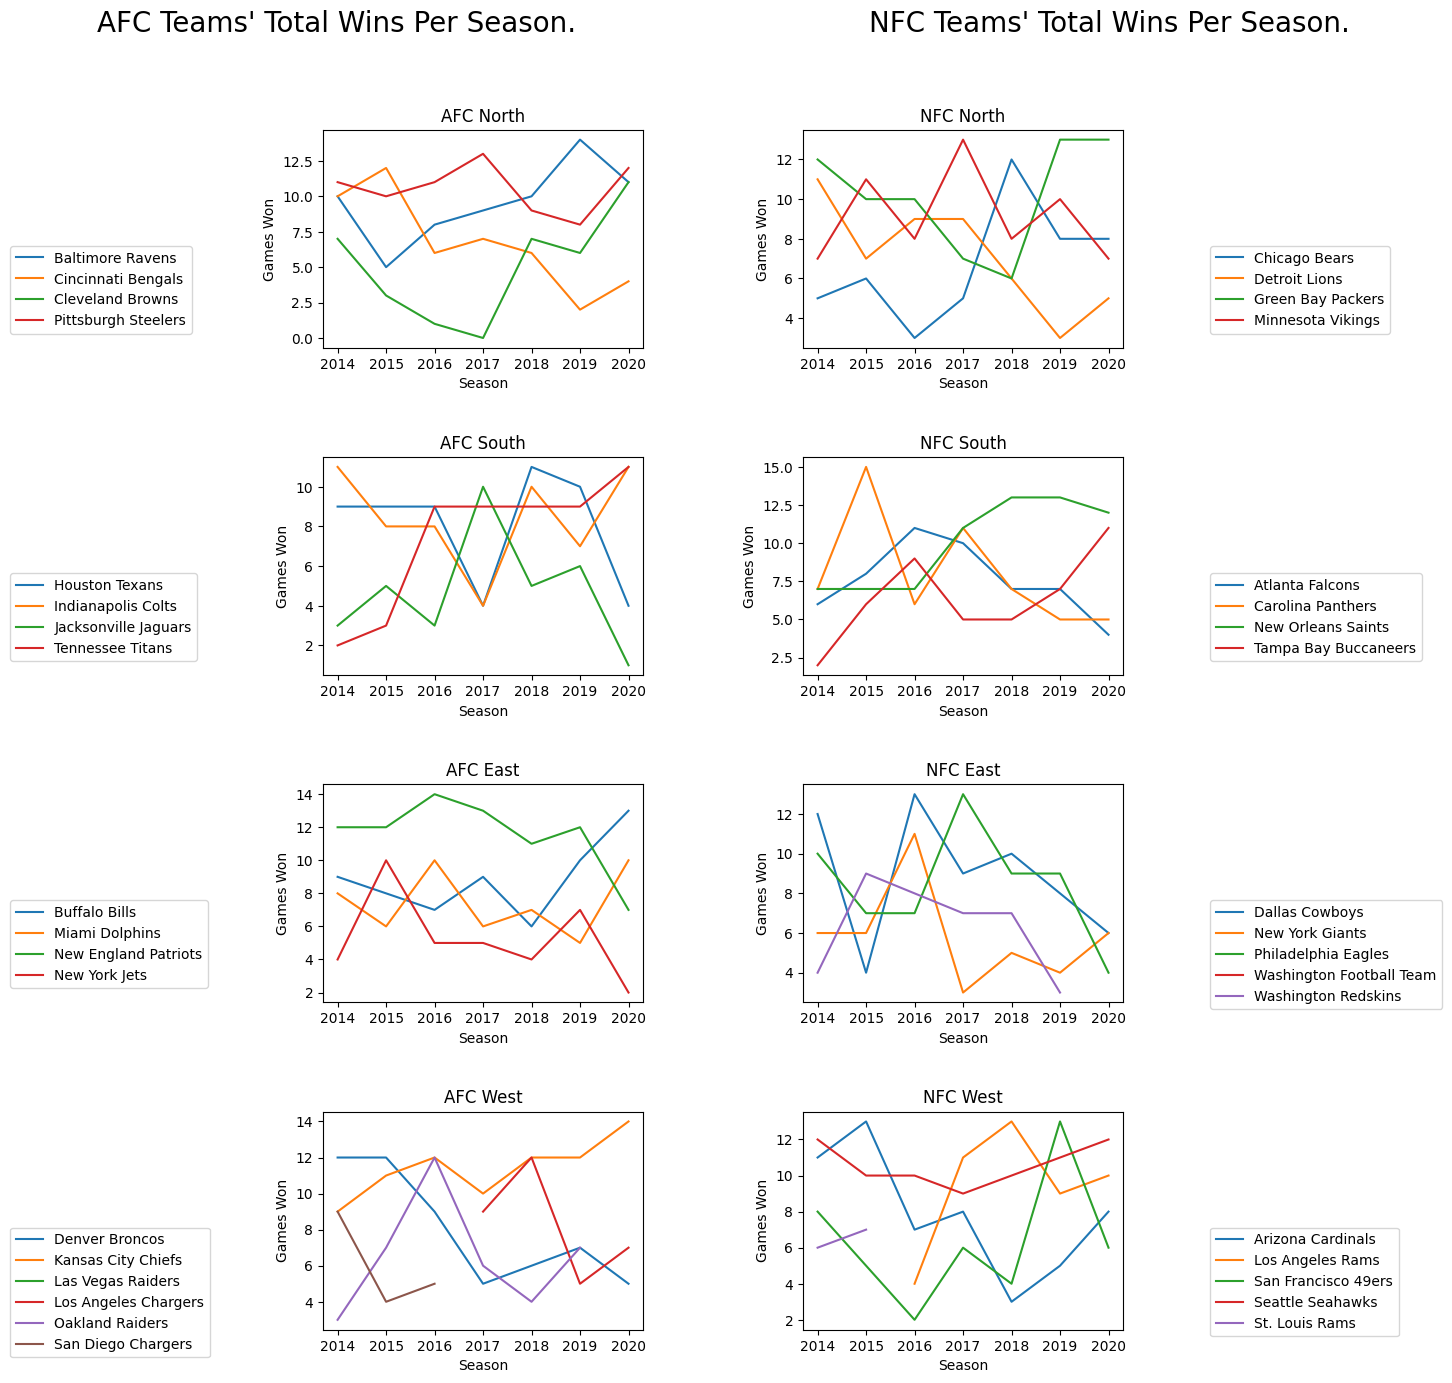

In [166]:
var = 0
fig, ax = plt.subplots(4, 2, figsize=(10,15), layout='constrained')    
fig.tight_layout(pad=5.0)
fig.subplots_adjust(left = 0.1, top = 0.9, right = 0.9, bottom = 0.1, hspace = 0.5, wspace = 0.5)
title = "AFC Teams' Total Wins Per Season.                                 NFC Teams' Total Wins Per Season." + "\n"
fig.suptitle(title, fontsize=20)
label_loc = 0

for var in range(2):
    xfc = afc
    label_loc = -1
    if (var==1):
        xfc = nfc
        label_loc = +1.25
        
    for team in range(len(full_team_list)):
    
        for league in range(len(xfc)):
            league = (league%4)
        
            if (current_teams.loc[full_team_list[team]]["team_division"] == xfc[league]) == True:
                                   
                ax[league][var].set_xlabel('Season')
                ax[league][var].set_ylabel('Games Won')

                ax[league][var].plot(season_years, seasonWinGraph[full_team_list[team]], label=full_team_list[team])
                ax[league][var].legend(loc='upper left', bbox_to_anchor=(label_loc, .5))
                
    for league in range(len(xfc)):
        
        ax[league][var].set_title(xfc[league])

    var += 1
    
plt.show(var)

These graphs illustrate each team's success over the years 2014-2020. We decided to separate them by division. Some divisions have five teams because of location changes.

#### Step 2

Now that we have each team's wins and losses for each season, we can define what it means to be a good, average, and bad team. We will do this by taking the STD, mean, and analyzing boxplots of wins per team for each season from 2014-2020. This is because our Salary Cap dataset only has data from 2014-2020.

In [167]:
seasonWins_to2020.std().mean()

3.1742396172056004

In [168]:
seasonWins_to2020.mean().mean()

7.96875

When looking at mean and STD, it shows us that the average amount of wins per season is approximately 8. Let's generalize that 8 wins is the average and any team within one standard deviation is considered average. Therefore, 0-4 wins classify a team as "Bad", 5-11 wins classify a team as "Average", and 12-16 wins classify a team as "Good".

In [169]:
seasonWins_to2020.median().mean()

7.857142857142857

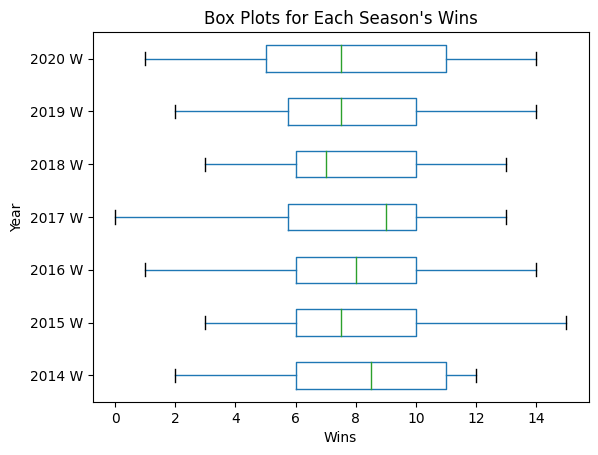

In [170]:
boxplot = seasonWins_to2020.boxplot(grid=False,vert=False)
plt.xlabel('Wins') 
plt.ylabel('Year') 
plt.title("Box Plots for Each Season's Wins")
plt.show(boxplot)

When looking at the median and box plots we see that the median (7.86) is almost exactly our mean (7.97) which indicates that the data is normally distributed. Therefore, we do not have to worry about too many outliers. This outcome further justifies our definitions for good, average, and bad.
It is also worth mentioning that the 3rd quartile (75%) is approximately 10 wins on average and the 1st quartile (25%) is approximately 5 wins on average. These results further support our definitions.

#### Step 3

Before we look at the differences in positions paid for good, average, and bad, let’s look at positional value from a league level. In other words, which positions does the NFL at a whole value higher than others? This provides us with a basis going forward. Let’s see how every position takes a bite out of the pie:).

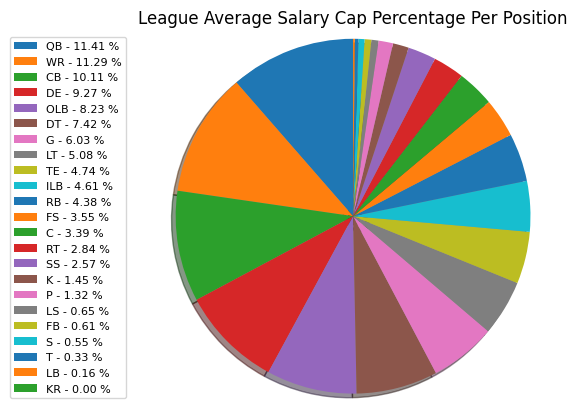

In [171]:
y = salary_cap.groupby("pos")[["cap_percent"]].sum()
y = y.reset_index()
y.groupby("pos")[["cap_percent"]].sum()
y.sort_values("cap_percent",ascending=False,inplace=True)

mylabels = y["pos"]
ys = y["cap_percent"]

porcent = 100.*ys/ys.sum()
patches, texts = plt.pie(ys, startangle=90, radius=1.2,shadow = True)
labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(mylabels,porcent)]

sort_legend = True
if sort_legend:
    patches, labels, dummy =  zip(*sorted(zip(patches, labels, ys),
                                          key=lambda x: x[2],
                                          reverse=True))

plt.legend(patches, labels, loc='upper right', bbox_to_anchor=(-0.1, 1.),
           fontsize=8)
plt.title("League Average Salary Cap Percentage Per Position")

plt.show()

Throughout the years 2014-2020, there is a large portion of the teams cap percentage going towards QB, WR, CB, DE, OLB, G, and DT. Approximately 64% of any given team’s total cap space is devoted to these 7 positions. We will further investigate this to see if winning franchises pay different positions more frequently than losing franchises.


Now, we want to classify these teams into our stated definitions of "good", "average", and "bad". Once they are classified into these groups, we will then use the Salary Cap DataFrame to identify what the top 5 positions for that team were in terms of salary cap percentage. Next, we will count the total number of positions by each group: good, average, and bad, to try to identify if there are differences in the positional valuation. 

In [172]:
number = 2014
Win_Values = [16.0, 15.0, 14.0, 13.0, 12.0, 11.0, 10.0, 9.0, 8.0, 7.0, 6.0, 5.0, 4.0, 3.0, 2.0, 1.0, 0.0]
pos_list = ["C", "CB", "DE", "DT", "FB", "FS", "G", "ILB", "K", "KR", "LB", "LS", "LT", "OLB", "P", "QB", "RB", "RT", "S", "SS", "T", "TE", "WR"] 


for i in range(20-13):
    var = "win" + str(number) 
    globals()[var] = pd.DataFrame()
    globals()[var]["Win Values"] = Win_Values
    globals()[var] = globals()[var].set_index("Win Values")
    
        
    for position in pos_list:
        globals()[var][position] = 0 
    
    number += 1

In [173]:
season_years = [2014, 2015, 2016, 2017, 2018, 2019, 2020]
season_yrs = [2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022]
pos_list = ["C", "CB", "DE", "DT", "FB", "FS", "G", "ILB", "K", "KR", "LB", "LS", "LT", "OLB", "P", "QB", "RB", "RT", "S", "SS", "T", "TE", "WR"] 
year = 2014
yr = 14
x=0
for year in range(len(season_years)):
    
    lst = "team_list" + str(yr)
    
    cap = "cap" + str(yr)
    
    stringW = str(season_yrs[year]) + " W"
    
    df_name = "win" + str(season_years[year])
    
    for team in globals()[lst]:
        winScore = year_rec[stringW].loc[team]
    
        df = globals()[cap][globals()[cap]["team"]==team].sort_values(by = ["cap_percent"], ascending=False).head(5)


        df = df.reset_index()
    
        for i in range(len(df)):
            top5.loc[x] = df.iloc[i]
            x = x + 1

        for position in pos_list:
            for i in range(len(df["pos"])):
                if df.loc[i]["pos"] == position:
                    globals()[df_name].loc[winScore][position] = globals()[df_name].loc[winScore][position] + 1
    
    year += 1
    yr += 1

In [174]:
for year in range(len(season_years)):
    transposed = "w" + str(season_years[year])
    og = "win" + str(season_years[year])   
    globals()[transposed] = pd.DataFrame.transpose(globals()[og])

In [175]:
#All the stats added up from seasons 2014-2020
w14to20 = pd.DataFrame()
w14to20 = w2014 + w2015 + w2016 + w2017 + w2018 + w2019 + w2020

In [176]:
good = pd.DataFrame()
average = pd.DataFrame()
bad = pd.DataFrame()

for i in range(5):
    score = i + 12.0
    iscore = i + 0.0
    bad[iscore] = w14to20[iscore]
    good[score] = w14to20[score]
    
for i in range(7):
    score = i + 5.0
    average[score] = w14to20[score]

In [177]:
pos_freq = pd.DataFrame(index=w14to20.index, columns=["Good", "Average", "Bad"])
# pos_freq(columns =["Good", "Average", "Bad"] = 0

levels = [good, average, bad]
level_str = ["Good", "Average", "Bad"]

for i in range(len(levels)):
    pos_freq[level_str[i]] = levels[i].sum(axis=1)

#top 5 for Good: QB, LT, WR, OLB, CB
#top 5 for Average: QB, DE, WR, CB, OLB
#top 5 for Bad: WR, CB, QB, DE, OLB

In [178]:
for year in range(len(season_years)):
    string = str(season_years[year]) + " W"
    
    for team in range(len(full_team_list)):
        
        for i in range(len(top5)):
            
            if (top5.loc[i]["season"]== season_years[year]):
                
                if (top5.loc[i]["team"]== full_team_list[team]):
                    top5.loc[i, "Season Wins"] = seasonWins.loc[full_team_list[team]][string]
                  

In [179]:
top5.head(5)

,Player,pos,cap_percent,season,team,Season Wins
0,Carson Palmer,QB,9.57,2014,Arizona Cardinals,11.0
1,Calais Campbell,DE,8.28,2014,Arizona Cardinals,11.0
2,Larry Fitzgerald,WR,6.33,2014,Arizona Cardinals,11.0
3,Patrick Peterson,CB,5.11,2014,Arizona Cardinals,11.0
4,Jerraud Powers,CB,3.5,2014,Arizona Cardinals,11.0


The above DataFrame, top5, identifies the top 5 highest paid positions for each team in each season. Based on previously defined definitions of good, average, and bad, the positions will be counted respectively for each classifier.

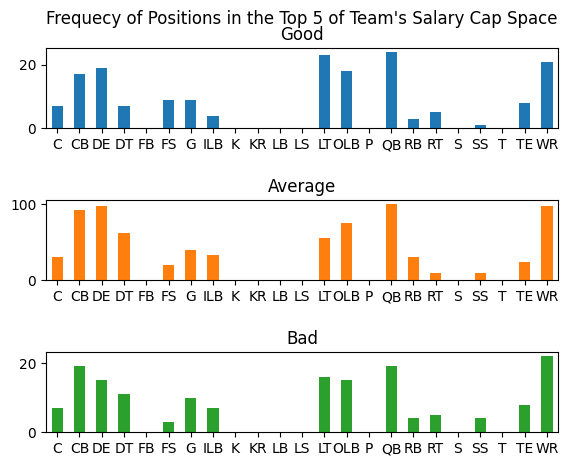

In [180]:
axes = pos_freq.plot.bar(rot=0, subplots=True, legend=None, sharex=False, title="Frequecy of Positions in the Top 5 of Team's Salary Cap Space")
fig.tight_layout(pad=5.0)
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9,wspace=0.4,hspace=0.9)

Here, we are trying to analyze if there is a difference in what positions good, average, and bad teams pay. These graphs are showing the frequency that a position was in the top 5 for their respective team in terms of market cap percentage. From these graphs, we see that there are a core group of positions that are valued higher than others. These positions are as follows: CB, DE, WR, LT, QB, OLB. Based on these findings, we will only analyze these position's statistics because it is apparent that NFL teams value them higher than others. 

QB, WR, CB, DE, OLB, G, and DT - these are the top positions from the overall league data. When looking at the separate groups, we notice that the LT position is clearly valued as important also. The rest of the positions seem to be closely in line with the league average. It also is worth mentioning that less of the time good teams pay DT compared to average and bad teams. 

### Significant Positions:
#### Offense: 
QB, WR, G, LT

#### Defense 
CB, DE, OLB, DT

When we were creating models for each position, we noticed an issue with OLB and DE. Since we were using data from two different sources, the players were classified into different positions. Some were listed as DE and others as OLB. Therefore, we decided to combine these two positions because they are alike and have a very similar function based on whichever type of defense the team runs (3-4 or 4-3).

### Updated Significant Positions:
#### Offense: 
QB, WR, G, LT

#### Defense 
CB, DE/OLB, DT

#### Step 4

We need the 7 highest paid players from each team for each significant position. The code below is completing this task.

In [181]:
other_cap = salary_cap.copy(deep=True)
other_cap['pos'] = other_cap['pos'].replace({"LB":"OLB/DE", "ILB":"OLB/DE","DE":"OLB/DE"})

num = 14
for i in range(20-13):
    x = "cap_" + str(num) 
    globals()[x] = pd.DataFrame(other_cap)
    fullYr = int(str(20) + str(num))
    globals()[x] = globals()[x][globals()[x]["season"]==fullYr]
    num += 1

In [182]:
idx_list = []
for i in range(2000):
    idx_list.append(i) 

top7 = pd.DataFrame(index=idx_list, columns=["Player", "pos", "cap_percent", "season", "team", "cap_hit"])
important_pos = ["QB", "WR", "G", "LT", "CB","OLB/DE", "DT"]
season_years = [14, 15, 16, 17, 18, 19, 20]

yr = 14
x=0
for year in range(len(season_years)):
    
    lst = "team_list" + str(season_years[year])
    
    cap = "cap_" + str(season_years[year])
    
    for team in globals()[lst]:
        
        df = globals()[cap][globals()[cap]["team"]==team].sort_values(by = ["cap_percent"], ascending=False)
        df = df.drop_duplicates(subset=['pos'])
        df = df.reset_index()
        df = df.drop(columns=["index"])
        
        for i in range(len(df)):
    
            for pos in range(len(important_pos)):
                test = pd.DataFrame(columns=["Player", "pos", "cap_percent", "season", "team", "cap_hit"])
                
                if df['pos'].iloc[i] == important_pos[pos]:
                    test.loc[i] = df.iloc[i]
                    test = test.dropna()
                    
                    top7.iloc[x] = test.loc[i]
                    x += 1

top7 = top7.dropna()
top7 = top7.drop(columns=["cap_hit"])
top7.head(7)

,Player,pos,cap_percent,season,team
0,Carson Palmer,QB,9.57,2014,Arizona Cardinals
1,Calais Campbell,OLB/DE,8.28,2014,Arizona Cardinals
2,Larry Fitzgerald,WR,6.33,2014,Arizona Cardinals
3,Patrick Peterson,CB,5.11,2014,Arizona Cardinals
4,Jonathan Cooper,G,2.43,2014,Arizona Cardinals
5,Dan Williams,DT,1.61,2014,Arizona Cardinals
6,Bradley Sowell,LT,0.42,2014,Arizona Cardinals


Top7 DataFrame identifies the 7 highest paid players at each significant position, for each team, for each season. As seen above, Top7 is showing the results for the 2014 Arizona Cardinals. This DataFrame is important because we will use this for our overall team wins model (Model 2). Each of these players will have predicted wins, which we will plug in for model 2 to predict the seasonal win value of the whole team.

In [183]:
seasonCapWins = top5[['season',"team",'Season Wins']].copy()
seasonCapWins = seasonCapWins.drop_duplicates()
seasonCapWins.head()

,season,team,Season Wins
0,2014,Arizona Cardinals,11.0
5,2014,Atlanta Falcons,6.0
10,2014,Baltimore Ravens,10.0
15,2014,Buffalo Bills,9.0
20,2014,Carolina Panthers,7.0


We need to add each team's respective wins for that season so we can predict this value in our model.

In [184]:
cap_wins = other_cap.merge(seasonCapWins, on=["season", "team",], how='left')
cap_wins.head()

,Player,pos,cap_hit,cap_percent,season,team,Season Wins
0,Lyle Sendlein,C,4125000,3.04,2014,Arizona Cardinals,11.0
1,Patrick Peterson,CB,6937132,5.11,2014,Arizona Cardinals,11.0
2,Jerraud Powers,CB,4750000,3.50,2014,Arizona Cardinals,11.0
3,Antonio Cromartie,CB,4000000,2.94,2014,Arizona Cardinals,11.0
4,Justin Bethel,CB,598556,0.44,2014,Arizona Cardinals,11.0


As previously stated, we want to combine DE and OLB. The code below is accomplishing this task.

In [185]:
cap_wins['pos'] = cap_wins['pos'].replace(['OLB'], 'OLB/DE')
cap_wins['pos'] = cap_wins['pos'].replace(['DE'], 'OLB/DE')
cap_wins[cap_wins["pos"]=='OLB/DE'].head(3)

,Player,pos,cap_hit,cap_percent,season,team,Season Wins
5,Calais Campbell,OLB/DE,11250000,8.28,2014,Arizona Cardinals,11.0
6,Matt Shaughnessy,OLB/DE,1625000,1.20,2014,Arizona Cardinals,11.0
7,Alex Okafor,OLB/DE,613607,0.45,2014,Arizona Cardinals,11.0


<h1><center>4. Modeling & Evaluation of Models<h1><center>

# Our Models

For both models, we decided to run a linear regression model. This is because a linear regression model has beta coefficients which learn which stats or positions matter more to the success of the overall model. This is important for our models because there are many different statistics and position groups.

#### Model 1

We looked at each season from 2014-2020, took seasonal stats for each position, then separated each position's stats into a unique DataFrame. Therefore, there is one DataFrame per significant position. The observations are the individual players and the columns are stats for that given position, including games won in each season - "Season Wins".

Next, with these DataFrames, we created a predictive model for each position. It predicts the amount of games won in a season for each player based on their seasonal statistics.

Independent Variables: Given stats for a certain position. Example: QB stats - passing yards, rushing yards, passing TDs, interceptions, etc.

Dependent variable: Wins for a player. Example: Daniel Jones - 7 wins


#### Model 2

Once we have each team’s significant players' projected wins, we trained another predictive model on the player position models to predict a team’s total wins with these given players.

Independent variables: Predicted wins from the models above for each specific position group. Example: QB 10.7 wins, DE 8.3 wins, CB 11.4 wins, etc.

Dependent variable: Wins for a team. Example: New York Giants - 14 wins


# Model 1 and Web Scraping

## Defense WebScraper

#### Scraping to create table 8:

Now, we need to scrape each position's statistics for seasons 2014-2020. We found the site "https://www.pro-football-reference.com/" that has season stats for each position. It has stats such as, total sacks, QB pressures, passes defended, passing touchdowns, interceptions, etc.

We will scrape this data into a DataFrame. It has unnecessary stats such as fumbles recovered for touchdowns and yards gained after an interception. Therefore, we need to do some cleanup work to make it more useful to our overall goal. It also only has abbreviations of team names, so we will need to correct that issue so we can merge this DataFrame with the DataFrame that contains the top 7 significant players.

Before that, with the defense DataFrame, we need to map the specific positions to the general positions we will be examining: CB, OLB/DE, and DT. Once this is done, we will build a linear regression model for each position, predicting the number of wins a player will win in a season, given their stats. 

After this is done, we will merge this with the top7 DataFrame we've made to take the highest paid players of these positions on each team. We will then build our second model with those predicted win values, predicting a team's total win value for a given season with each highest paid position's win prediction.

To do this, we must repeat this process for the other positions, then we will be ready to build our second and final model.

In [186]:
#WEB-SCRAPING FOR LOOP RESPONSIBLE FOR DEFENSIVE POSITIONS

years = [2014,2015,2016,2017,2018,2019,2020]
df_list = []
for y in years:
    
    url = 'https://www.pro-football-reference.com/years/' + str(y) + '/defense.htm'
    headers = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_10_1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/39.0.2171.95 Safari/537.36'}

    b = requests.get(url, headers=headers)
    soup = BeautifulSoup(b.content)
    table = soup.find("table")
    table_df = pd.read_html(str(table))[0]
    
    table_df = table_df.fillna(value=0)
    table_df.columns = table_df.columns.droplevel()
    table_df["season"]=y
    
    table_df = table_df.drop(columns=["Yds", "TD", "Lng", "Fmb", "Sfty","Rk"])
    table_df = table_df.rename(columns={"Tm":"Team", "Pos":"pos", "G":"Played", "GS":"Started", "PD":"Pass Def", "Sk":"Sack"})
    table_df["Player"] = table_df["Player"].apply(lambda x: x.replace("*","").replace("+","")) 
    
     
    if (y<=2015):
        table_df["Team"] = table_df["Team"].map({
    "HOU": "Houston Texans", "CHI": "Chicago Bears", "TAM": "Tampa Bay Buccaneers",
    "NYJ": "New York Jets", "NYG": "New York Giants", "BUF": "Buffalo Bills",
    "ARI":"Arizona Cardinals", "DAL": "Dallas Cowboys","TEN": "Tennessee Titans",
    "IND": "Indianapolis Colts","JAX": "Jacksonville Jaguars","SEA": "Seattle Seahawks",
    "SFO": "San Francisco 49ers","CIN": "Cincinnati Bengals","ATL": "Atlanta Falcons",
    "DEN": "Denver Broncos", "NWE": "New England Patriots","PHI": "Philadelphia Eagles",
    "NOR": "New Orleans Saints","STL": "St. Louis Rams","MIN": "Minnesota Vikings",
    "CAR": "Carolina Panthers","KAN": "Kansas City Chiefs", "SD": "San Diego Chargers",
    "BAL": "Baltimore Ravens","GNB": "Green Bay Packers", "MIA": "Miami Dolphins",
    "DET": "Detroit Lions", "WAS": "Washington Redskins","OAK": "Oakland Raiders",
    "PIT": "Pittsburgh Steelers", "CLE": "Cleveland Browns"})
            
    if (y==2016):
        table_df["Team"] = table_df["Team"].map({
    "HOU": "Houston Texans", "CHI": "Chicago Bears", "TAM": "Tampa Bay Buccaneers",
    "NYJ": "New York Jets", "NYG": "New York Giants", "BUF": "Buffalo Bills",
    "ARI":"Arizona Cardinals", "DAL": "Dallas Cowboys","TEN": "Tennessee Titans",
    "IND": "Indianapolis Colts","JAX": "Jacksonville Jaguars","SEA": "Seattle Seahawks",
    "SFO": "San Francisco 49ers","CIN": "Cincinnati Bengals","ATL": "Atlanta Falcons",
    "DEN": "Denver Broncos", "NWE": "New England Patriots","PHI": "Philadelphia Eagles",
    "NOR": "New Orleans Saints","LAR": "Los Angeles Rams","MIN": "Minnesota Vikings",
    "CAR": "Carolina Panthers","KAN": "Kansas City Chiefs", "SD": "San Diego Chargers",
    "BAL": "Baltimore Ravens","GNB": "Green Bay Packers", "MIA": "Miami Dolphins",
    "DET": "Detroit Lions", "WAS": "Washington Redskins","OAK": "Oakland Raiders",
    "PIT": "Pittsburgh Steelers", "CLE": "Cleveland Browns"})
            
    
    if y>2016 and y<2020: 
        table_df["Team"] = table_df["Team"].map({
    "HOU": "Houston Texans", "CHI": "Chicago Bears", "TAM": "Tampa Bay Buccaneers",
    "NYJ": "New York Jets", "NYG": "New York Giants", "BUF": "Buffalo Bills",
    "ARI":"Arizona Cardinals", "DAL": "Dallas Cowboys","TEN": "Tennessee Titans",
    "IND": "Indianapolis Colts","JAX": "Jacksonville Jaguars","SEA": "Seattle Seahawks",
    "SFO": "San Francisco 49ers","CIN": "Cincinnati Bengals","ATL": "Atlanta Falcons",
    "DEN": "Denver Broncos", "NWE": "New England Patriots","PHI": "Philadelphia Eagles",
    "NOR": "New Orleans Saints","LAR": "Los Angeles Rams","MIN": "Minnesota Vikings",
    "CAR": "Carolina Panthers","KAN": "Kansas City Chiefs", "LAC": "Los Angeles Chargers",
    "BAL": "Baltimore Ravens","GNB": "Green Bay Packers", "MIA": "Miami Dolphins",
    "DET": "Detroit Lions", "WAS": "Washington Redskins","OAK": "Oakland Raiders",
    "PIT": "Pittsburgh Steelers", "CLE": "Cleveland Browns"})
            
    if (y==2020):     
        table_df["Team"] = table_df["Team"].map({
    "HOU": "Houston Texans", "CHI": "Chicago Bears", "TAM": "Tampa Bay Buccaneers",
    "NYJ": "New York Jets", "NYG": "New York Giants", "BUF": "Buffalo Bills",
    "ARI":"Arizona Cardinals", "DAL": "Dallas Cowboys","TEN": "Tennessee Titans",
    "IND": "Indianapolis Colts","JAX": "Jacksonville Jaguars","SEA": "Seattle Seahawks",
    "SFO": "San Francisco 49ers","CIN": "Cincinnati Bengals","ATL": "Atlanta Falcons",
    "DEN": "Denver Broncos", "NWE": "New England Patriots","PHI": "Philadelphia Eagles",
    "NOR": "New Orleans Saints","LAR": "Los Angeles Rams","MIN": "Minnesota Vikings",
    "CAR": "Carolina Panthers","KAN": "Kansas City Chiefs", "LAC": "Los Angeles Chargers",
    "BAL": "Baltimore Ravens","GNB": "Green Bay Packers", "MIA": "Miami Dolphins",
    "DET": "Detroit Lions", "WAS": "Washington Football Team","LVR": "Las Vegas Raiders",
    "PIT": "Pittsburgh Steelers", "CLE": "Cleveland Browns"})
    
    table_df = table_df.rename(columns={"Team":"team"})
    df_list.append(table_df)

In [187]:
defense = pd.concat(df_list)
defense.head()

,Player,team,Age,pos,Played,Started,Int,Pass Def,FF,FR,Sack,Comb,Solo,Ast,TFL,QBHits,season
0,DeAndre Levy,Detroit Lions,27,RLB,16,16,1,4,0,0,2.5,151,117,34,16,4,2014
1,Lavonte David,Tampa Bay Buccaneers,24,RLB,14,14,0,4,4,1,1.0,146,101,45,17,4,2014
2,Luke Kuechly,Carolina Panthers,23,MLB,16,16,1,12,1,1,3.0,153,99,54,9,4,2014
3,Curtis Lofton,New Orleans Saints,28,RILB,16,16,0,1,1,1,0.0,144,99,45,5,4,2014
4,Morgan Burnett,Green Bay Packers,25,SS,15,15,1,4,1,1,1.5,130,94,36,4,3,2014


In [188]:
#A PROBLEM COMES UP WHEN WEBSCRAPING FROM THIS PARTICULAR SOURCE: IN THE TABLE, EVERY 20-30 ROWS, 
# THERE IS A REPEATED LABEL ROW, WHICH NEEDS TO BE DELETED FROM THE DF
# THEY LOOK LIKE THIS
defense[defense["Played"]=="G"].head()

,Player,team,Age,pos,Played,Started,Int,Pass Def,FF,FR,Sack,Comb,Solo,Ast,TFL,QBHits,season
29,Player,NaN,Age,Pos,G,GS,Int,PD,FF,FR,Sk,Comb,Solo,Ast,TFL,QBHits,2014
60,Player,NaN,Age,Pos,G,GS,Int,PD,FF,FR,Sk,Comb,Solo,Ast,TFL,QBHits,2014
91,Player,NaN,Age,Pos,G,GS,Int,PD,FF,FR,Sk,Comb,Solo,Ast,TFL,QBHits,2014
122,Player,NaN,Age,Pos,G,GS,Int,PD,FF,FR,Sk,Comb,Solo,Ast,TFL,QBHits,2014
153,Player,NaN,Age,Pos,G,GS,Int,PD,FF,FR,Sk,Comb,Solo,Ast,TFL,QBHits,2014


In [189]:
#Removing NULL/Labeling Observations/Rows. 308 of them have to be removed
lenDEF = len(defense)
gs = defense["Played"].value_counts()["G"]
print("Original length of defense is " + str(lenDEF) + ". There are " + str(gs) + " null rows in this DF. Therefore, \nif done correctly, the final\nlength of 'defense' should be: " + str(lenDEF-gs))     

Original length of defense is 9639. There are 308 null rows in this DF. Therefore, 
if done correctly, the final
length of 'defense' should be: 9331


In [190]:
delete = defense[defense['Played']=='G']
defense = defense.drop(delete.index)
print("Now, 'defense' DF length is: " + str(len(defense)) +"! We've successfully removed all of the null rows.")

Now, 'defense' DF length is: 9331! We've successfully removed all of the null rows.


The dtypes are not correct so we will update them.

In [191]:
#CHECKING DTYPES
def_cols = ['Age', 'Played','Started','Int','Pass Def','FF','FR','Sack','Comb','Solo','Ast','TFL','QBHits']
defense[def_cols] = defense[def_cols].apply(pd.to_numeric)

Dtypes are now good to go.

In [192]:
defense["pos"].value_counts().head(100)

DB        1489
LB         950
WR         670
RB         633
DE         623
          ... 
LG/RG        1
CB/SS        1
DB-RLB       1
CB-DB        1
NT-RDT       1
Name: pos, Length: 100, dtype: int64

In [193]:
#Generalizing specific defense positions such as ROLB or LOLB to OLB.
DEF_dict = {"LB": "OLB/DE","ROLB/LIL": "OLB/DE","ROLB/RIL": "OLB/DE","LOLB": "OLB/DE","ROLB": "OLB/DE","ROLB/LOL": "OLB/DE","LB-ROLB": "OLB/DE","OLB": "OLB/DE","LLB-ROLB": "OLB/DE","LB-LDE":"OLB/DE","RDE/LOLB": "OLB/DE","DE-LOLB": "OLB/DE","DE-ROLB": "OLB/DE","LDE": "OLB/DE","RDE": "OLB/DE","DE": "OLB/DE","LDE/RDE": "OLB/DE","DE-RDE": "OLB/DE","RDE/LDE": "OLB/DE","LDE/LDT": "DT","LDE/NT": "OLB/DE","RDE/LDT": "DT","DE/DT": "DT","RCB": "CB","LCB": "CB","DB-LCB": "CB", "DB-RCB/L": "CB","DB-RCB": "CB","LCB/RCB": "CB","CB": "CB","CB/SS": "CB","CB-DB": "CB","RCB/LCB": "CB","RCB/DB": "CB","RCB/FS": "CB","RCB/SS": "CB","LCB/FS": "CB","DT-RDE": "DT","DT/DE": "DT", "RDT": "DT","LDT": "DT","DT": "DT", "LDT/RDT": "DT", "DT-FB": "DT", "NT-RDT": "DT", "RDT/LDT": "DT", "DT-NT": "DT"}
defense["pos"] = defense["pos"].map(DEF_dict)

In [194]:
defense['pos'].value_counts()

OLB/DE    2299
DT         827
CB         592
Name: pos, dtype: int64

In [195]:
#Creating new DataFrames for each position we'll be examining. With defense, they are DE/OLB, DT, and CB
DE_df = defense[defense["pos"]=="DE"]
DT_df = defense[defense["pos"]=="DT"]
CB_df = defense[defense["pos"]=="CB"]
OLB_df = defense[defense["pos"]=="OLB"]
OLB_DE_df = defense[(defense["pos"]=="OLB/DE")]

In [196]:
DTs = cap_wins.merge(DT_df, on=["Player", "season", "pos",], how='inner')
DTs = DTs.drop(columns=["team_y"])
DTs = DTs.rename(columns={"team_x":"team"})

CBs = cap_wins.merge(CB_df, on=["Player", "season", "pos"], how='inner')
CBs = CBs.drop(columns=["team_y"])
CBs = CBs.rename(columns={"team_x":"team"})

OLBs_DEs = cap_wins.merge(OLB_DE_df, on=["Player", "season",'pos'], how='inner')
OLBs_DEs = OLBs_DEs.rename(columns={"Season Wins_x	":"Season Wins"})
OLBs_DEs = OLBs_DEs.drop(columns=["team_y"])
OLBs_DEs = OLBs_DEs.rename(columns={"team_x":"team"})

Now we have each defensive position separated into their respective position groups. We are in the clear to run the separate models for each defensive position group.

## OLB/DE Linear Regression Model

In [197]:
#Choosing test features
OLBs_DEsfeats = ['Age', 'Played', 'Started', 'Int', 'Pass Def', 'FF', 'FR','Sack', 'Comb', 'Solo', 'Ast', 'TFL', 'QBHits']
#Assigning X (features/attributes)
x = OLBs_DEs[OLBs_DEsfeats]
#Assigning Y (label/predicted val)
y = OLBs_DEs['Season Wins']


#Split the data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.5, random_state=10)

#Standardizing the data
scaler = StandardScaler()
scaler.fit(x_train)
x_train_sc = scaler.transform(x_train)
x_test_sc = scaler.transform(x_test)


#Setting up Linear Regression Model
linReg = LinearRegression()
linReg.fit(x_train_sc, y_train)

#Letting model make prediction
y_test_pred = linReg.predict(x_test_sc)
y_train_pred = linReg.predict(x_train_sc)


#Checking MAE, MSE, and RMSE
vMAE = (metrics.mean_absolute_error(y_test, y_test_pred))
tMAE = (metrics.mean_absolute_error(y_train, y_train_pred))
cMAE = np.mean(-cross_val_score(linReg, x, y, cv=5, scoring="neg_mean_absolute_error"))


vMSE = (metrics.mean_squared_error(y_test, y_test_pred))
tMSE = (metrics.mean_squared_error(y_train, y_train_pred))
cross_val_mse = np.mean(-cross_val_score(linReg, x, y, cv=5, scoring="neg_mean_squared_error"))

vRMSE = math.sqrt(vMSE)
tRMSE = math.sqrt(tMSE)
cRMSE = math.sqrt(cross_val_mse)

print("Testing MAE:")
print(tMAE)
print("\n")

print("5-Fold Cross Validation MAE:")
print(cMAE)
print("\n")

print("Testing RMSE:")
print(tRMSE)
print("\n")

print("5-Fold Cross Validation RMSE:")
print(cRMSE)
OLB_DE_vMAE = cMAE
OLB_DE_vRMSE = cRMSE

Testing MAE:
2.623493042133408


5-Fold Cross Validation MAE:
2.599071296318077


Testing RMSE:
3.130027709377392


5-Fold Cross Validation RMSE:
3.0956328670742583


In [198]:
OLBDEdrop = ['cap_hit','pos', 'Age', 'Played', 'Started', 'Int', 'Pass Def', 'FF', 'FR','Sack', 'Comb', 'Solo', 'Ast', 'TFL', 'QBHits']

Some of the highest paid players of this position will be in the training set, and some others will be in the test set. Since we need all of their predictions, we are making a new DataFrame that contains these players' positions, teams, season, cap percent, and most importantly, predicted wins and actual wins.

In [199]:
OLBDE_Train = OLBs_DEs.loc[y_train.index]
OLBDE_Train = OLBDE_Train.drop(columns = OLBDEdrop)
OLBDE_Train
OLBDE_Train["Predicted Wins"] = y_train_pred
#____________________________________________________________________________________________________________________________
OLBDE_Test = OLBs_DEs.loc[y_test.index]
OLBDE_Test = OLBDE_Test.drop(columns = OLBDEdrop)
OLBDE_Test
OLBDE_Test["Predicted Wins"] = y_test_pred


predictedOLBDEs = pd.concat([OLBDE_Test, OLBDE_Train])
predictedOLBDEs['pos']='OLB/DE'
predictedOLBDEs

,Player,cap_percent,season,team,Season Wins,Predicted Wins,pos
910,Samson Ebukam,0.38,2017,Los Angeles Rams,11.0,7.721413,OLB/DE
1307,Connor Barwin,4.55,2016,Philadelphia Eagles,7.0,8.017153,OLB/DE
1040,Ifeadi Odenigbo,0.41,2020,Minnesota Vikings,7.0,8.352596,OLB/DE
361,Khalid Kareem,0.34,2020,Cincinnati Bengals,4.0,7.871348,OLB/DE
471,Francis Bernard,0.21,2020,Dallas Cowboys,6.0,7.994172,OLB/DE
...,...,...,...,...,...,...,...
1393,Cassius Marsh,0.09,2020,Pittsburgh Steelers,12.0,7.680391,OLB/DE
1344,Terence Garvin,0.37,2014,Pittsburgh Steelers,11.0,7.854041,OLB/DE
527,Josh Watson,0.02,2020,Denver Broncos,5.0,7.822986,OLB/DE
1149,George Selvie,0.84,2015,New York Giants,6.0,8.120184,OLB/DE


Because of issues with inconsistencies in the salary_cap dataset, and the statistical datasets we are using, we have faced unexpected issues when merging. This is causing NaN values in 'Season Wins' and 'Predicted Wins' for the players who have inconsistencies within both datasets. Of course, this is not ideal, but later on, we will try to solve this issue by imputing values for the missing data.

In [200]:
predictedOLBDEs_top7 = top7[top7['pos']=='OLB/DE']
predictedOLBDEs_top7 = predictedOLBDEs_top7.merge(predictedOLBDEs, on=["Player","pos", "season","cap_percent",'team'], how='left')
predictedOLBDEs_top7

,Player,pos,cap_percent,season,team,Season Wins,Predicted Wins
0,Calais Campbell,OLB/DE,8.28,2014,Arizona Cardinals,11.0,8.091527
1,Tyson Jackson,OLB/DE,2.33,2014,Atlanta Falcons,NaN,NaN
2,Chris Canty,OLB/DE,2.41,2014,Baltimore Ravens,10.0,7.472618
3,Mario Williams,OLB/DE,12.48,2014,Buffalo Bills,9.0,8.069840
4,Charles Johnson,OLB/DE,8.09,2014,Carolina Panthers,7.0,8.307562
...,...,...,...,...,...,...,...
219,Arik Armstead,OLB/DE,2.9,2020,San Francisco 49ers,6.0,7.714027
220,Bobby Wagner,OLB/DE,7.39,2020,Seattle Seahawks,NaN,NaN
221,Lavonte David,OLB/DE,5.27,2020,Tampa Bay Buccaneers,NaN,NaN
222,Rashaan Evans,OLB/DE,1.43,2020,Tennessee Titans,NaN,NaN


In [201]:
predictedOLBDEs_top7.isna().sum()

Player             0
pos                0
cap_percent        0
season             0
team               0
Season Wins       68
Predicted Wins    68
dtype: int64

We have 68 NaN values. This means out of the 224 total OLB/DE top7 players, we are missing 68 of them. This is most likely due to differences in the datasets that we worked with.

## CB Linear Regression Model

In [202]:
#Choosing test features
CBsfeats = ['Age', 'Played', 'Started', 'Int', 'Pass Def', 'FF', 'FR','Sack', 'Comb', 'Solo', 'Ast', 'TFL', 'QBHits']
#Assigning X (features/attributes)
x = CBs[CBsfeats]
#Assigning Y (label/predicted val)
y = CBs['Season Wins']


#Split the data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.5, random_state=10)

#Standardizing the data
scaler = StandardScaler()
scaler.fit(x_train)
x_train_sc = scaler.transform(x_train)
x_test_sc = scaler.transform(x_test)


#Setting up Linear Regression Model
linReg = LinearRegression()
linReg.fit(x_train_sc, y_train)

#Letting model make prediction
y_test_pred = linReg.predict(x_test_sc)
y_train_pred = linReg.predict(x_train_sc)


#Checking MAE, MSE, and RMSE
vMAE = (metrics.mean_absolute_error(y_test, y_test_pred))
tMAE = (metrics.mean_absolute_error(y_train, y_train_pred))
cMAE = np.mean(-cross_val_score(linReg, x, y, cv=5, scoring="neg_mean_absolute_error"))


vMSE = (metrics.mean_squared_error(y_test, y_test_pred))
tMSE = (metrics.mean_squared_error(y_train, y_train_pred))
cross_val_mse = np.mean(-cross_val_score(linReg, x, y, cv=5, scoring="neg_mean_squared_error"))

vRMSE = math.sqrt(vMSE)
tRMSE = math.sqrt(tMSE)
cRMSE = math.sqrt(cross_val_mse)

print("Testing MAE:")
print(tMAE)
print("\n")

print("5-Fold Cross Validation MAE:")
print(cMAE)
print("\n")

print("Testing RMSE:")
print(tRMSE)
print("\n")

print("5-Fold Cross Validation RMSE:")
print(cRMSE)
CB_vMAE = cMAE
CB_vRMSE = cRMSE

Testing MAE:
2.3488045652256155


5-Fold Cross Validation MAE:
2.5817357271641113


Testing RMSE:
2.7963306015776164


5-Fold Cross Validation RMSE:
3.10030497159783


In [203]:
CBdrop = ['cap_hit','pos', 'Age', 'Played', 'Started', 'Int', 'Pass Def', 'FF', 'FR','Sack', 'Comb', 'Solo', 'Ast', 'TFL', 'QBHits']


In [204]:
CB_Train = CBs.loc[y_train.index]
CB_Train = CB_Train.drop(columns = CBdrop)
CB_Train["Predicted Wins"] = y_train_pred
#____________________________________________________________________________________________________________________________
CB_Test = CBs.loc[y_test.index]
CB_Test = CB_Test.drop(columns = CBdrop)
CB_Test["Predicted Wins"] = y_test_pred


predictedCBs = pd.concat([CB_Test, CB_Train])
predictedCBs['pos']='CB'
predictedCBs

,Player,cap_percent,season,team,Season Wins,Predicted Wins,pos
151,Nevin Lawson,1.11,2017,Detroit Lions,9.0,7.792570,CB
325,Jayron Hosley,0.56,2015,New York Giants,6.0,7.043016,CB
435,D.J. Reed,0.29,2020,Seattle Seahawks,12.0,7.190811,CB
387,William Gay,1.16,2015,Pittsburgh Steelers,10.0,8.412958,CB
311,Marshon Lattimore,1.71,2017,New Orleans Saints,11.0,9.170796,CB
...,...,...,...,...,...,...,...
369,Byron Maxwell,5.79,2015,Philadelphia Eagles,7.0,8.145154,CB
320,Dominique Rodgers-Cromartie,2.08,2014,New York Giants,6.0,8.374978,CB
15,Dre Kirkpatrick,0.38,2020,Arizona Cardinals,8.0,6.913169,CB
125,Morris Claiborne,1.69,2016,Dallas Cowboys,13.0,7.292970,CB


In [205]:
predictedCBs_top7 = top7[top7['pos']=='CB']
predictedCBs_top7 = predictedCBs_top7.merge(predictedCBs, on=["Player","pos", "season","cap_percent",'team'], how='left')
predictedCBs_top7

,Player,pos,cap_percent,season,team,Season Wins,Predicted Wins
0,Patrick Peterson,CB,5.11,2014,Arizona Cardinals,11.0,7.490565
1,Desmond Trufant,CB,1.4,2014,Atlanta Falcons,6.0,8.635652
2,Lardarius Webb,CB,5.7,2014,Baltimore Ravens,10.0,7.316481
3,Leodis McKelvin,CB,3.04,2014,Buffalo Bills,9.0,7.281883
4,Josh Norman,CB,0.45,2014,Carolina Panthers,7.0,8.369538
...,...,...,...,...,...,...,...
219,Richard Sherman,CB,6.77,2020,San Francisco 49ers,6.0,6.628221
220,Shaquill Griffin,CB,1.16,2020,Seattle Seahawks,12.0,7.323850
221,Ryan Smith,CB,0.86,2020,Tampa Bay Buccaneers,NaN,NaN
222,Malcolm Butler,CB,6.17,2020,Tennessee Titans,11.0,7.112323


In [206]:
predictedCBs_top7.isna().sum()

Player             0
pos                0
cap_percent        0
season             0
team               0
Season Wins       51
Predicted Wins    51
dtype: int64

## DT Linear Regression Model

In [207]:
#Choosing test features
DTsfeats = ['Age', 'Played', 'Started', 'Int', 'Pass Def', 'FF', 'FR','Sack', 'Comb', 'Solo', 'Ast', 'TFL', 'QBHits']
#Assigning X (features/attributes)
x = DTs[DTsfeats]
#Assigning Y (label/predicted val)
y = DTs['Season Wins']


#Split the data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.5, random_state=10)

#Standardizing the data
scaler = StandardScaler()
scaler.fit(x_train)
x_train_sc = scaler.transform(x_train)
x_test_sc = scaler.transform(x_test)


#Setting up Linear Regression Model
linReg = LinearRegression()
linReg.fit(x_train_sc, y_train)

#Letting model make prediction
y_test_pred = linReg.predict(x_test_sc)
y_train_pred = linReg.predict(x_train_sc)


#Checking MAE, MSE, and RMSE
vMAE = (metrics.mean_absolute_error(y_test, y_test_pred))
tMAE = (metrics.mean_absolute_error(y_train, y_train_pred))
cMAE = np.mean(-cross_val_score(linReg, x, y, cv=5, scoring="neg_mean_absolute_error"))


vMSE = (metrics.mean_squared_error(y_test, y_test_pred))
tMSE = (metrics.mean_squared_error(y_train, y_train_pred))
cross_val_mse = np.mean(-cross_val_score(linReg, x, y, cv=5, scoring="neg_mean_squared_error"))

vRMSE = math.sqrt(vMSE)
tRMSE = math.sqrt(tMSE)
cRMSE = math.sqrt(cross_val_mse)

print("Testing MAE:")
print(tMAE)
print("\n")

print("5-Fold Cross Validation MAE:")
print(cMAE)
print("\n")

print("Testing RMSE:")
print(tRMSE)
print("\n")

print("5-Fold Cross Validation RMSE:")
print(cRMSE)
DT_vMAE = cMAE
DT_vRMSE = cRMSE

Testing MAE:
2.5966832786169007


5-Fold Cross Validation MAE:
2.7024186236654755


Testing RMSE:
3.142937499323274


5-Fold Cross Validation RMSE:
3.2494586618701518


In [208]:
DTdrop = ['cap_hit','pos', 'Age', 'Played', 'Started', 'Int', 'Pass Def', 'FF', 'FR','Sack', 'Comb', 'Solo', 'Ast', 'TFL', 'QBHits']


In [209]:
DT_Train = DTs.loc[y_train.index]
DT_Train = DT_Train.drop(columns = DTdrop)
DT_Train["Predicted Wins"] = y_train_pred
#____________________________________________________________________________________________________________________________
DT_Test = DTs.loc[y_test.index]
DT_Test = DT_Test.drop(columns = DTdrop)
DT_Test["Predicted Wins"] = y_test_pred


predictedDTs = pd.concat([DT_Test, DT_Train])
predictedDTs['pos']='DT'
predictedDTs

,Player,cap_percent,season,team,Season Wins,Predicted Wins,pos
223,Grover Stewart,1.45,2020,Indianapolis Colts,11.0,4.861680,DT
361,Tyeler Davison,0.34,2015,New Orleans Saints,7.0,7.670108,DT
458,Daniel McCullers,0.54,2019,Pittsburgh Steelers,8.0,8.219933,DT
486,Brandon Mebane,4.20,2014,Seattle Seahawks,12.0,7.563699,DT
523,Sealver Siliga,0.64,2017,Tampa Bay Buccaneers,5.0,8.288873,DT
...,...,...,...,...,...,...,...
369,Tyeler Davison,1.11,2018,New Orleans Saints,13.0,9.641209,DT
320,Toby Johnson,0.03,2016,Minnesota Vikings,8.0,8.303789,DT
527,Beau Allen,2.05,2019,Tampa Bay Buccaneers,7.0,8.127512,DT
125,Xavier Williams,0.25,2020,Cincinnati Bengals,4.0,8.533900,DT


In [210]:
predictedDTs_top7 = top7[top7['pos']=='DT']
predictedDTs_top7 = predictedDTs_top7.merge(predictedDTs, on=["Player","pos", "season","cap_percent",'team'], how='left')
predictedDTs_top7

,Player,pos,cap_percent,season,team,Season Wins,Predicted Wins
0,Dan Williams,DT,1.61,2014,Arizona Cardinals,NaN,NaN
1,Paul Soliai,DT,4.06,2014,Atlanta Falcons,6.0,6.397270
2,Haloti Ngata,DT,10.64,2014,Baltimore Ravens,NaN,NaN
3,Marcell Dareus,DT,4.31,2014,Buffalo Bills,9.0,7.559048
4,Star Lotulelei,DT,1.57,2014,Carolina Panthers,7.0,6.550562
...,...,...,...,...,...,...,...
219,Javon Kinlaw,DT,1.36,2020,San Francisco 49ers,6.0,9.692927
220,Jarran Reed,DT,4.68,2020,Seattle Seahawks,12.0,9.561605
221,Ndamukong Suh,DT,3.92,2020,Tampa Bay Buccaneers,NaN,NaN
222,DaQuan Jones,DT,3.78,2020,Tennessee Titans,NaN,NaN


In [211]:
predictedDTs_top7.isna().sum()

Player             0
pos                0
cap_percent        0
season             0
team               0
Season Wins       87
Predicted Wins    87
dtype: int64

## QB WebScraper

In [212]:
#WEB-SCRAPING FOR LOOP RESPONSIBLE FOR QUARTERBACKS

years = [2014,2015,2016,2017,2018,2019,2020]
QB_list = []
for y in years:
    
    url = 'https://www.pro-football-reference.com/years/' + str(y) + '/passing.htm'
    headers = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_10_1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/39.0.2171.95 Safari/537.36'}

    b = requests.get(url, headers=headers)
    soup = BeautifulSoup(b.content)
    table = soup.find("table")
    table_df = pd.read_html(str(table))[0]
    
    table_df = table_df.fillna(value=0)
    table_df["season"]=y
    
    table_df = table_df.drop(columns=["Rk",])
    table_df = table_df.rename(columns={"Tm":"Team", "Pos":"pos","G":"Played", "GS":"Started", "Cmp":"Completed", "Att":"Attempted", "Sk":"Times Sacked", "Yds.1":"Sacked -Yards"})
    table_df["Player"] = table_df["Player"].apply(lambda x: x.replace("*","").replace("+","")) 
    

    if (y<=2015):
        table_df["Team"] = table_df["Team"].map({
    "HOU": "Houston Texans", "CHI": "Chicago Bears", "TAM": "Tampa Bay Buccaneers",
    "NYJ": "New York Jets", "NYG": "New York Giants", "BUF": "Buffalo Bills",
    "ARI":"Arizona Cardinals", "DAL": "Dallas Cowboys","TEN": "Tennessee Titans",
    "IND": "Indianapolis Colts","JAX": "Jacksonville Jaguars","SEA": "Seattle Seahawks",
    "SFO": "San Francisco 49ers","CIN": "Cincinnati Bengals","ATL": "Atlanta Falcons",
    "DEN": "Denver Broncos", "NWE": "New England Patriots","PHI": "Philadelphia Eagles",
    "NOR": "New Orleans Saints","STL": "St. Louis Rams","MIN": "Minnesota Vikings",
    "CAR": "Carolina Panthers","KAN": "Kansas City Chiefs", "SD": "San Diego Chargers",
    "BAL": "Baltimore Ravens","GNB": "Green Bay Packers", "MIA": "Miami Dolphins",
    "DET": "Detroit Lions", "WAS": "Washington Redskins","OAK": "Oakland Raiders",
    "PIT": "Pittsburgh Steelers", "CLE": "Cleveland Browns"})
            
    if (y==2016):
        table_df["Team"] = table_df["Team"].map({
    "HOU": "Houston Texans", "CHI": "Chicago Bears", "TAM": "Tampa Bay Buccaneers",
    "NYJ": "New York Jets", "NYG": "New York Giants", "BUF": "Buffalo Bills",
    "ARI":"Arizona Cardinals", "DAL": "Dallas Cowboys","TEN": "Tennessee Titans",
    "IND": "Indianapolis Colts","JAX": "Jacksonville Jaguars","SEA": "Seattle Seahawks",
    "SFO": "San Francisco 49ers","CIN": "Cincinnati Bengals","ATL": "Atlanta Falcons",
    "DEN": "Denver Broncos", "NWE": "New England Patriots","PHI": "Philadelphia Eagles",
    "NOR": "New Orleans Saints","LAR": "Los Angeles Rams","MIN": "Minnesota Vikings",
    "CAR": "Carolina Panthers","KAN": "Kansas City Chiefs", "SD": "San Diego Chargers",
    "BAL": "Baltimore Ravens","GNB": "Green Bay Packers", "MIA": "Miami Dolphins",
    "DET": "Detroit Lions", "WAS": "Washington Redskins","OAK": "Oakland Raiders",
    "PIT": "Pittsburgh Steelers", "CLE": "Cleveland Browns"})
            
    if y>2016 and y<2020: 
        table_df["Team"] = table_df["Team"].map({
    "HOU": "Houston Texans", "CHI": "Chicago Bears", "TAM": "Tampa Bay Buccaneers",
    "NYJ": "New York Jets", "NYG": "New York Giants", "BUF": "Buffalo Bills",
    "ARI":"Arizona Cardinals", "DAL": "Dallas Cowboys","TEN": "Tennessee Titans",
    "IND": "Indianapolis Colts","JAX": "Jacksonville Jaguars","SEA": "Seattle Seahawks",
    "SFO": "San Francisco 49ers","CIN": "Cincinnati Bengals","ATL": "Atlanta Falcons",
    "DEN": "Denver Broncos", "NWE": "New England Patriots","PHI": "Philadelphia Eagles",
    "NOR": "New Orleans Saints","LAR": "Los Angeles Rams","MIN": "Minnesota Vikings",
    "CAR": "Carolina Panthers","KAN": "Kansas City Chiefs", "LAC": "Los Angeles Chargers",
    "BAL": "Baltimore Ravens","GNB": "Green Bay Packers", "MIA": "Miami Dolphins",
    "DET": "Detroit Lions", "WAS": "Washington Redskins","OAK": "Oakland Raiders",
    "PIT": "Pittsburgh Steelers", "CLE": "Cleveland Browns"})
            
    if (y==2020):     
        table_df["Team"] = table_df["Team"].map({
    "HOU": "Houston Texans", "CHI": "Chicago Bears", "TAM": "Tampa Bay Buccaneers",
    "NYJ": "New York Jets", "NYG": "New York Giants", "BUF": "Buffalo Bills",
    "ARI":"Arizona Cardinals", "DAL": "Dallas Cowboys","TEN": "Tennessee Titans",
    "IND": "Indianapolis Colts","JAX": "Jacksonville Jaguars","SEA": "Seattle Seahawks",
    "SFO": "San Francisco 49ers","CIN": "Cincinnati Bengals","ATL": "Atlanta Falcons",
    "DEN": "Denver Broncos", "NWE": "New England Patriots","PHI": "Philadelphia Eagles",
    "NOR": "New Orleans Saints","LAR": "Los Angeles Rams","MIN": "Minnesota Vikings",
    "CAR": "Carolina Panthers","KAN": "Kansas City Chiefs", "LAC": "Los Angeles Chargers",
    "BAL": "Baltimore Ravens","GNB": "Green Bay Packers", "MIA": "Miami Dolphins",
    "DET": "Detroit Lions", "WAS": "Washington Football Team","LVR": "Las Vegas Raiders",
    "PIT": "Pittsburgh Steelers", "CLE": "Cleveland Browns"})
    
    table_df = table_df.rename(columns={"Team":"team"})
    QB_list.append(table_df)

In [213]:
QB_df = pd.concat(QB_list)
QB_df = QB_df[QB_df["pos"]=="QB"]
cols = ['Age','Played', 'Started','Completed', 'Attempted', 'Cmp%', 'Yds', 'TD', 'TD%', 'Int', 'Int%','1D', 'Lng', 'Y/A', 'AY/A', 'Y/C', 'Y/G', 'Rate', 'QBR', 'Times Sacked','Sacked -Yards', 'Sk%', 'NY/A', 'ANY/A', '4QC', 'GWD', 'season']
QB_df[cols] = QB_df[cols].apply(pd.to_numeric)

In [214]:
QB_df.head(3)

,Player,team,Age,pos,Played,Started,QBrec,Completed,Attempted,Cmp%,...,Rate,QBR,Times Sacked,Sacked -Yards,Sk%,NY/A,ANY/A,4QC,GWD,season
0,Drew Brees,New Orleans Saints,35,QB,16,16,7-9-0,456,659,69.2,...,97.0,73.2,29,186,4.2,6.93,6.77,2,2,2014
1,Ben Roethlisberger,Pittsburgh Steelers,32,QB,16,16,11-5-0,408,608,67.1,...,103.3,69.4,33,172,5.1,7.46,7.82,2,3,2014
2,Andrew Luck,Indianapolis Colts,25,QB,16,16,11-5-0,380,616,61.7,...,96.5,64.0,27,161,4.2,7.15,7.28,1,1,2014


In [215]:
QBs = cap_wins.merge(QB_df, on=["Player", "season", "pos"], how='inner')
QBs["team_y"].isna().sum()
QBs = QBs.drop(columns=["team_y"])
QBs = QBs.rename(columns={"team_x":"team"})

## QB Linear Regression Model

In [216]:
#Choosing test features
QBfeats = ['Age', 'Played', 'Started', 'Completed', 'Attempted', 'Cmp%', 'Yds','TD', 'TD%', 'Int', 'Int%', '1D', 'Lng', 'Y/A', 'AY/A', 'Y/C', 'Y/G', 'Rate', 'QBR', 'Times Sacked', 'Sacked -Yards', 'Sk%', 'NY/A', 'ANY/A','4QC', 'GWD']
#Assigning X (features/attributes)
x = QBs[QBfeats]
#Assigning Y (label/predicted val)
y = QBs['Season Wins']


#Split the data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1000)

#Standardizing the data
scaler = StandardScaler()
scaler.fit(x_train)
x_train_sc = scaler.transform(x_train)
x_test_sc = scaler.transform(x_test)


#Setting up Linear Regression Model
linReg = LinearRegression()
linReg.fit(x_train_sc, y_train)

#Letting model make prediction
y_test_pred = linReg.predict(x_test_sc)
y_train_pred = linReg.predict(x_train_sc)


#Checking MAE, MSE, and RMSE
vMAE = (metrics.mean_absolute_error(y_test, y_test_pred))
tMAE = (metrics.mean_absolute_error(y_train, y_train_pred))
cMAE = np.mean(-cross_val_score(linReg, x, y, cv=5, scoring="neg_mean_absolute_error"))


vMSE = (metrics.mean_squared_error(y_test, y_test_pred))
tMSE = (metrics.mean_squared_error(y_train, y_train_pred))
cross_val_mse = np.mean(-cross_val_score(linReg, x, y, cv=5, scoring="neg_mean_squared_error"))

vRMSE = math.sqrt(vMSE)
tRMSE = math.sqrt(tMSE)
cRMSE = math.sqrt(cross_val_mse)

print("Testing MAE:")
print(tMAE)
print("\n")

print("5-Fold Cross Validation MAE:")
print(cMAE)
print("\n")

print("Testing RMSE:")
print(tRMSE)
print("\n")

print("5-Fold Cross Validation RMSE:")
print(cRMSE)
QB_vMAE = cMAE
QB_vRMSE = cRMSE

Testing MAE:
1.9847586807799307


5-Fold Cross Validation MAE:
2.2114417240062805


Testing RMSE:
2.4580883713388935


5-Fold Cross Validation RMSE:
2.7687214501539352


In [217]:
QBdrop = ['pos', 'cap_percent', 'Age','Played', 'Started', 'QBrec', 'Completed', 'Attempted', 'Cmp%', 'Yds','TD', 'TD%', 'Int', 'Int%', '1D', 'Lng', 'Y/A', 'AY/A', 'Y/C', 'Y/G','Rate', 'QBR', 'Times Sacked', 'Sacked -Yards', 'Sk%', 'NY/A', 'ANY/A','4QC', 'GWD']

In [218]:
QB_Train = QBs.loc[y_train.index]
QB_Train = QB_Train.drop(columns = QBdrop)
QB_Train["Predicted Wins"] = y_train_pred
#____________________________________________________________________________________________________________________________
QB_Test = QBs.loc[y_test.index]
QB_Test = QB_Test.drop(columns = QBdrop)
QB_Test["Predicted Wins"] = y_test_pred


predictedQBs = pd.concat([QB_Test, QB_Train])
predictedQBs['pos']='QB'
predictedQBs = predictedQBs.drop(columns=["cap_hit",])

In [219]:
predictedQBs_top7 = top7[top7['pos']=='QB']
predictedQBs_top7 = predictedQBs_top7.merge(predictedQBs, on=["Player","pos", "season", "team"], how='left')

In [220]:
predictedQBs_top7.isna().sum()

Player            0
pos               0
cap_percent       0
season            0
team              0
Season Wins       4
Predicted Wins    4
dtype: int64

## WR WebScraper

In [221]:
#WEB-SCRAPING FOR LOOP RESPONSIBLE FOR WIDE RECEIVERS

years = [2014,2015,2016,2017,2018,2019,2020]
WR_list = []
for y in years:
    
    url = 'https://www.pro-football-reference.com/years/' + str(y) + '/receiving.htm'
    headers = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_10_1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/39.0.2171.95 Safari/537.36'}

    b = requests.get(url, headers=headers)
    soup = BeautifulSoup(b.content)
    table = soup.find("table")
    table_df = pd.read_html(str(table))[0]
    
    table_df = table_df.fillna(value=0)
    table_df["season"]=y
    
    table_df = table_df.drop(columns=["Rk",])
    table_df = table_df.rename(columns={"Tm":"Team", "Pos":"pos","G":"Played", "GS":"Started", "Tgt":"Targets", "Rec":"Received"})
    table_df["Player"] = table_df["Player"].apply(lambda x: x.replace("*","").replace("+","")) 
    table_df["Ctch%"] = table_df["Ctch%"].apply(lambda x: x.replace('%',"")) 


    if (y<=2015):
        table_df["Team"] = table_df["Team"].map({
    "HOU": "Houston Texans", "CHI": "Chicago Bears", "TAM": "Tampa Bay Buccaneers",
    "NYJ": "New York Jets", "NYG": "New York Giants", "BUF": "Buffalo Bills",
    "ARI":"Arizona Cardinals", "DAL": "Dallas Cowboys","TEN": "Tennessee Titans",
    "IND": "Indianapolis Colts","JAX": "Jacksonville Jaguars","SEA": "Seattle Seahawks",
    "SFO": "San Francisco 49ers","CIN": "Cincinnati Bengals","ATL": "Atlanta Falcons",
    "DEN": "Denver Broncos", "NWE": "New England Patriots","PHI": "Philadelphia Eagles",
    "NOR": "New Orleans Saints","STL": "St. Louis Rams","MIN": "Minnesota Vikings",
    "CAR": "Carolina Panthers","KAN": "Kansas City Chiefs", "SD": "San Diego Chargers",
    "BAL": "Baltimore Ravens","GNB": "Green Bay Packers", "MIA": "Miami Dolphins",
    "DET": "Detroit Lions", "WAS": "Washington Redskins","OAK": "Oakland Raiders",
    "PIT": "Pittsburgh Steelers", "CLE": "Cleveland Browns"})
            
    if (y==2016):
        table_df["Team"] = table_df["Team"].map({
    "HOU": "Houston Texans", "CHI": "Chicago Bears", "TAM": "Tampa Bay Buccaneers",
    "NYJ": "New York Jets", "NYG": "New York Giants", "BUF": "Buffalo Bills",
    "ARI":"Arizona Cardinals", "DAL": "Dallas Cowboys","TEN": "Tennessee Titans",
    "IND": "Indianapolis Colts","JAX": "Jacksonville Jaguars","SEA": "Seattle Seahawks",
    "SFO": "San Francisco 49ers","CIN": "Cincinnati Bengals","ATL": "Atlanta Falcons",
    "DEN": "Denver Broncos", "NWE": "New England Patriots","PHI": "Philadelphia Eagles",
    "NOR": "New Orleans Saints","LAR": "Los Angeles Rams","MIN": "Minnesota Vikings",
    "CAR": "Carolina Panthers","KAN": "Kansas City Chiefs", "SD": "San Diego Chargers",
    "BAL": "Baltimore Ravens","GNB": "Green Bay Packers", "MIA": "Miami Dolphins",
    "DET": "Detroit Lions", "WAS": "Washington Redskins","OAK": "Oakland Raiders",
    "PIT": "Pittsburgh Steelers", "CLE": "Cleveland Browns"})
            
    if y>2016 and y<2020: 
        table_df["Team"] = table_df["Team"].map({
    "HOU": "Houston Texans", "CHI": "Chicago Bears", "TAM": "Tampa Bay Buccaneers",
    "NYJ": "New York Jets", "NYG": "New York Giants", "BUF": "Buffalo Bills",
    "ARI":"Arizona Cardinals", "DAL": "Dallas Cowboys","TEN": "Tennessee Titans",
    "IND": "Indianapolis Colts","JAX": "Jacksonville Jaguars","SEA": "Seattle Seahawks",
    "SFO": "San Francisco 49ers","CIN": "Cincinnati Bengals","ATL": "Atlanta Falcons",
    "DEN": "Denver Broncos", "NWE": "New England Patriots","PHI": "Philadelphia Eagles",
    "NOR": "New Orleans Saints","LAR": "Los Angeles Rams","MIN": "Minnesota Vikings",
    "CAR": "Carolina Panthers","KAN": "Kansas City Chiefs", "LAC": "Los Angeles Chargers",
    "BAL": "Baltimore Ravens","GNB": "Green Bay Packers", "MIA": "Miami Dolphins",
    "DET": "Detroit Lions", "WAS": "Washington Redskins","OAK": "Oakland Raiders",
    "PIT": "Pittsburgh Steelers", "CLE": "Cleveland Browns"})
            
    if (y==2020):     
        table_df["Team"] = table_df["Team"].map({
    "HOU": "Houston Texans", "CHI": "Chicago Bears", "TAM": "Tampa Bay Buccaneers",
    "NYJ": "New York Jets", "NYG": "New York Giants", "BUF": "Buffalo Bills",
    "ARI":"Arizona Cardinals", "DAL": "Dallas Cowboys","TEN": "Tennessee Titans",
    "IND": "Indianapolis Colts","JAX": "Jacksonville Jaguars","SEA": "Seattle Seahawks",
    "SFO": "San Francisco 49ers","CIN": "Cincinnati Bengals","ATL": "Atlanta Falcons",
    "DEN": "Denver Broncos", "NWE": "New England Patriots","PHI": "Philadelphia Eagles",
    "NOR": "New Orleans Saints","LAR": "Los Angeles Rams","MIN": "Minnesota Vikings",
    "CAR": "Carolina Panthers","KAN": "Kansas City Chiefs", "LAC": "Los Angeles Chargers",
    "BAL": "Baltimore Ravens","GNB": "Green Bay Packers", "MIA": "Miami Dolphins",
    "DET": "Detroit Lions", "WAS": "Washington Football Team","LVR": "Las Vegas Raiders",
    "PIT": "Pittsburgh Steelers", "CLE": "Cleveland Browns"})
    
    table_df = table_df.rename(columns={"Team":"team"})
    WR_list.append(table_df)

In [222]:
WR_df = pd.concat(WR_list)
WR_df = WR_df[WR_df["pos"]=="WR"]
features = ['Age', 'Played', 'Started', 'Targets', 'Received', 'Ctch%', 'Yds', 'Y/R', 'TD', '1D', 'Lng', 'Y/Tgt', 'R/G','Y/G', 'Fmb', 'season']
WR_df.head()

,Player,team,Age,pos,Played,Started,Targets,Received,Ctch%,Yds,Y/R,TD,1D,Lng,Y/Tgt,R/G,Y/G,Fmb,season
0,Antonio Brown,Pittsburgh Steelers,26,WR,16,16,181,129,71.3,1698,13.2,13,87,63,9.4,8.1,106.1,2,2014
1,Demaryius Thomas,Denver Broncos,27,WR,16,16,184,111,60.3,1619,14.6,11,69,86,8.8,6.9,101.2,0,2014
2,Julio Jones,Atlanta Falcons,25,WR,15,15,163,104,63.8,1593,15.3,6,76,79,9.8,6.9,106.2,2,2014
4,Emmanuel Sanders,Denver Broncos,27,WR,16,16,141,101,71.6,1404,13.9,9,69,48,10.0,6.3,87.8,1,2014
5,Golden Tate,Detroit Lions,26,WR,16,16,144,99,68.8,1331,13.4,4,61,73,9.2,6.2,83.2,1,2014


In [223]:
WR_df[features] = WR_df[features].apply(pd.to_numeric)

In [224]:
WRs = cap_wins.merge(WR_df, on=["Player", "season", "pos"], how='inner')
WRs = WRs.drop(columns=["team_y"])
WRs = WRs.rename(columns={"team_x":"team"})
WRs.drop_duplicates(subset=None, keep="first", inplace=True)
WRs.head()

,Player,pos,cap_hit,cap_percent,season,team,Season Wins,Age,Played,Started,...,Ctch%,Yds,Y/R,TD,1D,Lng,Y/Tgt,R/G,Y/G,Fmb
0,Larry Fitzgerald,WR,8600000,6.33,2014,Arizona Cardinals,11.0,31,14,13,...,61.2,784,12.4,2,39,80,7.6,4.5,56.0,1
1,Michael Floyd,WR,2719500,2.00,2014,Arizona Cardinals,11.0,25,16,14,...,47.5,841,17.9,6,34,63,8.5,2.9,52.6,3
2,Ted Ginn Jr.,WR,2250000,1.66,2014,Arizona Cardinals,11.0,29,16,0,...,53.8,190,13.6,0,9,27,7.3,0.9,11.9,2
3,John Brown,WR,555725,0.41,2014,Arizona Cardinals,11.0,24,16,5,...,47.1,696,14.5,5,31,75,6.8,3.0,43.5,0
4,Jaron Brown,WR,498000,0.37,2014,Arizona Cardinals,11.0,24,16,2,...,68.8,229,10.4,2,14,26,7.2,1.4,14.3,1


## WR Linear Regression Model

In [225]:
#Choosing test features
WRfeats = ['Age','Played', 'Started', 'Targets', 'Received', 'Ctch%', 'Yds', 'Y/R', 'TD','1D', 'Lng', 'Y/Tgt', 'R/G', 'Y/G', 'Fmb']
#Assigning X (features/attributes)
x = WRs[WRfeats]
#Assigning Y (label/predicted val)
y = WRs['Season Wins']


#Split the data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1000)

#Standardizing the data
scaler = StandardScaler()
scaler.fit(x_train)
x_train_sc = scaler.transform(x_train)
x_test_sc = scaler.transform(x_test)


#Setting up Linear Regression Model
linReg = LinearRegression()
linReg.fit(x_train_sc, y_train)

#Letting model make prediction
y_test_pred = linReg.predict(x_test_sc)
y_train_pred = linReg.predict(x_train_sc)


#Checking MAE, MSE, and RMSE
vMAE = (metrics.mean_absolute_error(y_test, y_test_pred))
tMAE = (metrics.mean_absolute_error(y_train, y_train_pred))
cMAE = np.mean(-cross_val_score(linReg, x, y, cv=5, scoring="neg_mean_absolute_error"))


vMSE = (metrics.mean_squared_error(y_test, y_test_pred))
tMSE = (metrics.mean_squared_error(y_train, y_train_pred))
cross_val_mse = np.mean(-cross_val_score(linReg, x, y, cv=5, scoring="neg_mean_squared_error"))

vRMSE = math.sqrt(vMSE)
tRMSE = math.sqrt(tMSE)
cRMSE = math.sqrt(cross_val_mse)

print("Testing MAE:")
print(tMAE)
print("\n")

print("5-Fold Cross Validation MAE:")
print(cMAE)
print("\n")

print("Testing RMSE:")
print(tRMSE)
print("\n")

print("5-Fold Cross Validation RMSE:")
print(cRMSE)
WR_vMAE = cMAE
WR_vRMSE = cRMSE

Testing MAE:
2.459737767679193


5-Fold Cross Validation MAE:
2.523587374635732


Testing RMSE:
2.9470541651226076


5-Fold Cross Validation RMSE:
3.0306521346433604


In [226]:
WRdrop = ['cap_hit', 'Age', 'Played', 'Started', 'Targets', 'Received','Ctch%', 'Yds', 'Y/R', 'TD', '1D', 'Lng', 'Y/Tgt', 'R/G', 'Y/G', 'Fmb']

In [227]:
WR_Train = WRs.loc[y_train.index]
WR_Train = WR_Train.drop(columns = WRdrop)
WR_Train["Predicted Wins"] = y_train_pred
#____________________________________________________________________________________________________________________________
WR_Test = WRs.loc[y_test.index]
WR_Test = WR_Test.drop(columns = WRdrop)
WR_Test["Predicted Wins"] = y_test_pred


predictedWRs = pd.concat([WR_Train, WR_Test])
predictedWRs['pos']='WR'

In [228]:
predictedWRs_top7 = top7[top7['pos']=='WR']
predictedWRs_top7
predictedWRs_top7 = predictedWRs_top7.merge(predictedWRs, on=["Player","pos", "season", "team",'cap_percent'], how='left')
predictedWRs_top7.head()

,Player,pos,cap_percent,season,team,Season Wins,Predicted Wins
0,Larry Fitzgerald,WR,6.33,2014,Arizona Cardinals,11.0,7.149763
1,Roddy White,WR,4.67,2014,Atlanta Falcons,6.0,8.863835
2,Steve Smith,WR,1.65,2014,Baltimore Ravens,NaN,NaN
3,Sammy Watkins,WR,2.41,2014,Buffalo Bills,9.0,6.384086
4,Jerricho Cotchery,WR,1.23,2014,Carolina Panthers,7.0,7.840383


In [229]:
predictedWRs_top7.isna().sum()

Player             0
pos                0
cap_percent        0
season             0
team               0
Season Wins       10
Predicted Wins    10
dtype: int64

## LT DataFrame

Due to the issue of using separate sources for data, some of our left tackles were listed as right tackles or tackles. To fix this issue we will replace all tackle info to LT. In our findings above, left tackle was one of the highest paying positions and right tackle was not. Also, our top7 function identifies the highest paying LT, so we will not have to worry about a RT getting pulled into a LT top7 spot.  

In [230]:
display(cap_wins.loc[(cap_wins['pos']=='LT') | (cap_wins['pos']=="T") | (cap_wins['pos']=="RT")])

,Player,pos,cap_hit,cap_percent,season,team,Season Wins
28,Bradley Sowell,LT,570000,0.42,2014,Arizona Cardinals,11.0
42,Jared Veldheer,RT,2500000,1.84,2014,Arizona Cardinals,11.0
43,Bobby Massie,RT,680845,0.50,2014,Arizona Cardinals,11.0
44,Earl Watford,RT,603716,0.44,2014,Arizona Cardinals,11.0
86,D.J. Humphries,LT,1620384,1.09,2015,Arizona Cardinals,13.0
...,...,...,...,...,...,...,...
12124,Timon Parris,T,87354,0.05,2019,Washington Redskins,3.0
12134,Tyron Smith,LT,6800000,4.27,2017,Dallas Cowboys,9.0
12135,D.J. Humphries,LT,9625000,4.97,2018,Arizona Cardinals,3.0
12136,Ryan Clady,LT,10600000,7.31,2016,New York Jets,5.0


In [231]:
LTs  = stats_tackles[['season',"player",'position','team_name','player_game_count','grades_offense','snap_counts_pass_block','snap_counts_run_block','penalties','pressures_allowed','sacks_allowed','grades_pass_block','grades_run_block','hits_allowed','hurries_allowed']].copy()
LTs = stats_tackles.rename(columns={"player":"Player", "position":"pos"})
LTs['pos'] = LTs['pos'].str.replace('T','LT')
LTs = LTs[LTs['pos'] == "LT"]
LTs = cap_wins.merge(LTs, on=["Player", "season"], how='inner')
LTs = LTs.rename(columns={"pos_x":"pos", "pos_y":"pos from cap_wins"})
LTs = LTs.drop(columns=["team_name", "player_id","pos from cap_wins",'grades_pass_block','grades_run_block','non_spike_pass_block_percentage','pass_block_percent','pbe']) #might put back pos from cap
LTs.drop_duplicates(subset=None, keep="first", inplace=True)
LTs.replace(np.nan,0)


,Player,pos,cap_hit,cap_percent,season,team,Season Wins,player_game_count,block_percent,declined_penalties,...,snap_counts_ce,snap_counts_lg,snap_counts_lt,snap_counts_offense,snap_counts_pass_block,snap_counts_pass_play,snap_counts_rg,snap_counts_rt,snap_counts_run_block,snap_counts_te
0,Jared Veldheer,RT,2500000,1.84,2014,Arizona Cardinals,11.0,16,100.0,2,...,0,0,1068,1069,664,664,0,0,405,1
1,Bobby Massie,RT,680845,0.50,2014,Arizona Cardinals,11.0,16,100.0,1,...,0,0,0,1069,664,664,0,1069,405,0
2,Bradley Sowell,LT,760000,0.51,2015,Arizona Cardinals,13.0,5,100.0,0,...,0,0,32,33,7,7,0,0,26,1
3,Jared Veldheer,RT,8500000,5.72,2015,Arizona Cardinals,13.0,16,100.0,2,...,0,0,1070,1070,639,639,0,0,431,0
4,Bobby Massie,RT,1471433,0.99,2015,Arizona Cardinals,13.0,14,100.0,0,...,0,0,0,981,580,580,0,981,401,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
722,Donald Penn,LT,2030000,1.05,2019,Washington Redskins,3.0,16,100.0,1,...,0,0,884,885,553,553,0,0,332,1
723,Tyron Smith,LT,6800000,4.27,2017,Dallas Cowboys,9.0,13,100.0,0,...,0,0,757,758,430,430,0,0,328,1
724,D.J. Humphries,LT,9625000,4.97,2018,Arizona Cardinals,3.0,9,100.0,0,...,0,0,520,522,342,342,0,0,180,2
725,Ryan Clady,LT,10600000,7.31,2016,New York Jets,5.0,8,100.0,1,...,0,0,537,537,334,334,0,0,203,0


## LT Linear Regression Model

In [232]:
#Choosing test features
LTfeats = ['player_game_count','grades_offense','snap_counts_pass_block','snap_counts_run_block','penalties','pressures_allowed','sacks_allowed','hits_allowed','hurries_allowed']
#Assigning X (features/attributes)
x = LTs[LTfeats]
#Assigning Y (label/predicted val)
y = LTs['Season Wins']


#Split the data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1000)

#Standardizing the data
scaler = StandardScaler()
scaler.fit(x_train)
x_train_sc = scaler.transform(x_train)
x_test_sc = scaler.transform(x_test)


#Setting up Linear Regression Model
linReg = LinearRegression()
linReg.fit(x_train_sc, y_train)

#Letting model make prediction
y_test_pred = linReg.predict(x_test_sc)
y_train_pred = linReg.predict(x_train_sc)


#Checking MAE, MSE, and RMSE
vMAE = (metrics.mean_absolute_error(y_test, y_test_pred))
tMAE = (metrics.mean_absolute_error(y_train, y_train_pred))
cMAE = np.mean(-cross_val_score(linReg, x, y, cv=5, scoring="neg_mean_absolute_error"))


vMSE = (metrics.mean_squared_error(y_test, y_test_pred))
tMSE = (metrics.mean_squared_error(y_train, y_train_pred))
cross_val_mse = np.mean(-cross_val_score(linReg, x, y, cv=5, scoring="neg_mean_squared_error"))

vRMSE = math.sqrt(vMSE)
tRMSE = math.sqrt(tMSE)
cRMSE = math.sqrt(cross_val_mse)

print("Testing MAE:")
print(tMAE)
print("\n")

print("5-Fold Cross Validation MAE:")
print(cMAE)
print("\n")

print("Testing RMSE:")
print(tRMSE)
print("\n")

print("5-Fold Cross Validation RMSE:")
print(cRMSE)
LT_vMAE = cMAE
LT_vRMSE = cRMSE

Testing MAE:
2.327496903083801


5-Fold Cross Validation MAE:
2.4114029286123517


Testing RMSE:
2.8511905804827307


5-Fold Cross Validation RMSE:
2.9423044107090077


In [233]:
LTdrop = ['cap_hit','player_game_count', 'block_percent',
       'declined_penalties', 'franchise_id', 'grades_offense', 'hits_allowed',
       'hurries_allowed', 'non_spike_pass_block', 'penalties',
       'pressures_allowed', 'sacks_allowed', 'snap_counts_block',
       'snap_counts_ce', 'snap_counts_lg', 'snap_counts_lt',
       'snap_counts_offense', 'snap_counts_pass_block',
       'snap_counts_pass_play', 'snap_counts_rg', 'snap_counts_rt',
       'snap_counts_run_block', 'snap_counts_te']

In [234]:
LT_Train = LTs.loc[y_train.index]
LT_Train = LT_Train.drop(columns = LTdrop)
LT_Train["Predicted Wins"] = y_train_pred
#____________________________________________________________________________________________________________________________
LT_Test = LTs.loc[y_test.index]
LT_Test = LT_Test.drop(columns = LTdrop)
LT_Test["Predicted Wins"] = y_test_pred


predictedLTs = pd.concat([LT_Train, LT_Test])
predictedLTs['pos']='LT'

In [235]:
predictedLTs_top7 = top7[top7['pos']=='LT']
predictedLTs_top7 = predictedLTs_top7.merge(predictedLTs, on=["Player",'pos', "season", "team",'cap_percent'], how='left')
predictedLTs_top7

,Player,pos,cap_percent,season,team,Season Wins,Predicted Wins
0,Bradley Sowell,LT,0.42,2014,Arizona Cardinals,NaN,NaN
1,Jake Matthews,LT,2.25,2014,Atlanta Falcons,6.0,6.010811
2,Eugene Monroe,LT,2.43,2014,Baltimore Ravens,10.0,8.740452
3,Cordy Glenn,LT,0.88,2014,Buffalo Bills,9.0,7.255350
4,Byron Bell,LT,1.58,2014,Carolina Panthers,7.0,7.888935
...,...,...,...,...,...,...,...
219,Justin Skule,LT,0.35,2020,San Francisco 49ers,6.0,7.486821
220,Duane Brown,LT,6.29,2020,Seattle Seahawks,12.0,7.522365
221,Donovan Smith,LT,7.1,2020,Tampa Bay Buccaneers,11.0,6.573212
222,David Quessenberry,LT,0.2,2020,Tennessee Titans,11.0,9.376889


In [236]:
predictedLTs_top7.isna().sum()

Player             0
pos                0
cap_percent        0
season             0
team               0
Season Wins       18
Predicted Wins    18
dtype: int64

## Guards DataFrame

In [237]:
Gs  = stats_guards[['season',"player",'position','team_name','player_game_count','grades_offense','snap_counts_pass_block','snap_counts_run_block','penalties','pressures_allowed','sacks_allowed','grades_pass_block','grades_run_block','hits_allowed','hurries_allowed']].copy()
Gs = Gs.rename(columns={"player":"Player", "position":"pos"})
Gs = Gs[Gs['pos'] == "G"]
Gs = cap_wins.merge(Gs, on=["Player", "season", "pos"], how='inner')
Gs = Gs.drop(columns=["team_name"])
Gs.drop_duplicates(subset=None, keep="first", inplace=True)
Gs

,Player,pos,cap_hit,cap_percent,season,team,Season Wins,player_game_count,grades_offense,snap_counts_pass_block,snap_counts_run_block,penalties,pressures_allowed,sacks_allowed,grades_pass_block,grades_run_block,hits_allowed,hurries_allowed
0,Jonathan Cooper,G,3306591,2.43,2014,Arizona Cardinals,11.0,7,64.9,109,75,0,2,1,71.1,59.4,0,1
1,Ted Larsen,G,1065000,0.78,2014,Arizona Cardinals,11.0,16,63.1,652,398,11,33,3,62.7,68.3,12,18
2,Paul Fanaika,G,780000,0.57,2014,Arizona Cardinals,11.0,14,59.0,563,338,7,37,1,64.3,59.4,7,29
3,Mike Iupati,G,6700000,4.51,2015,Arizona Cardinals,13.0,13,80.3,497,318,2,22,3,69.1,79.3,6,13
4,Jonathan Cooper,G,3967910,2.67,2015,Arizona Cardinals,13.0,11,63.6,365,272,3,22,1,63.3,61.3,2,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
557,Arie Kouandjio,G,361764,0.20,2017,Washington Redskins,7.0,8,55.8,275,149,4,16,3,71.9,51.5,5,8
558,Ereck Flowers,G,3250000,1.68,2019,Washington Redskins,3.0,16,64.1,588,349,5,24,2,69.0,59.9,2,20
559,Wes Martin,G,657702,0.34,2019,Washington Redskins,3.0,5,51.7,191,99,3,16,1,37.0,56.9,3,12
560,Brian Winters,G,7000000,3.60,2019,New York Jets,7.0,9,61.0,346,180,2,22,2,54.6,60.7,4,16


## Guards Linear Regression Model

In [238]:
#Choosing test features
Gfeats = ['player_game_count','grades_offense','snap_counts_pass_block','snap_counts_run_block','penalties','pressures_allowed','sacks_allowed','hits_allowed','hurries_allowed']
#Assigning X (features/attributes)
x = Gs[Gfeats]
#Assigning Y (label/predicted val)
y = Gs['Season Wins']


#Split the data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1000)

#Standardizing the data
scaler = StandardScaler()
scaler.fit(x_train)
x_train_sc = scaler.transform(x_train)
x_test_sc = scaler.transform(x_test)


#Setting up Linear Regression Model
linReg = LinearRegression()
linReg.fit(x_train_sc, y_train)

#Letting model make prediction
y_test_pred = linReg.predict(x_test_sc)
y_train_pred = linReg.predict(x_train_sc)


#Checking MAE, MSE, and RMSE
vMAE = (metrics.mean_absolute_error(y_test, y_test_pred))
tMAE = (metrics.mean_absolute_error(y_train, y_train_pred))
cMAE = np.mean(-cross_val_score(linReg, x, y, cv=5, scoring="neg_mean_absolute_error"))


vMSE = (metrics.mean_squared_error(y_test, y_test_pred))
tMSE = (metrics.mean_squared_error(y_train, y_train_pred))
cross_val_mse = np.mean(-cross_val_score(linReg, x, y, cv=5, scoring="neg_mean_squared_error"))

vRMSE = math.sqrt(vMSE)
tRMSE = math.sqrt(tMSE)
cRMSE = math.sqrt(cross_val_mse)

print("Testing MAE:")
print(tMAE)
print("\n")

print("5-Fold Cross Validation MAE:")
print(cMAE)
print("\n")

print("Testing RMSE:")
print(tRMSE)
print("\n")

print("5-Fold Cross Validation RMSE:")
print(cRMSE)
G_vMAE = cMAE
G_vRMSE = cRMSE

Testing MAE:
2.292664159625098


5-Fold Cross Validation MAE:
2.3499593230658746


Testing RMSE:
2.818655723507456


5-Fold Cross Validation RMSE:
2.878306360342992


In [239]:
Gdrop = ['player_game_count',"cap_hit",'grades_offense','snap_counts_pass_block','snap_counts_run_block','penalties','pressures_allowed','sacks_allowed','grades_pass_block','grades_run_block','hits_allowed','hurries_allowed']

In [240]:
G_Train = Gs.loc[y_train.index]
G_Train = G_Train.drop(columns = Gdrop)
G_Train["Predicted Wins"] = y_train_pred
#____________________________________________________________________________________________________________________________
G_Test = Gs.loc[y_test.index]
G_Test = G_Test.drop(columns = Gdrop)
G_Test["Predicted Wins"] = y_test_pred


predictedGs = pd.concat([G_Train, G_Test])
predictedGs['pos']='G'

In [241]:
predictedGs_top7 = top7[top7['pos']=='G']
predictedGs_top7 = predictedGs_top7.merge(predictedGs, on=["Player","pos", "season", "team",'cap_percent'], how='left')
predictedGs_top7

,Player,pos,cap_percent,season,team,Season Wins,Predicted Wins
0,Jonathan Cooper,G,2.43,2014,Arizona Cardinals,11.0,8.057731
1,Justin Blalock,G,5.76,2014,Atlanta Falcons,6.0,7.026033
2,Marshal Yanda,G,6.42,2014,Baltimore Ravens,10.0,10.347530
3,Kraig Urbik,G,2.24,2014,Buffalo Bills,9.0,7.537907
4,Amini Silatolu,G,0.97,2014,Carolina Panthers,7.0,6.209177
...,...,...,...,...,...,...,...
219,Laken Tomlinson,G,2.13,2020,San Francisco 49ers,6.0,10.838903
220,Mike Iupati,G,1.25,2020,Seattle Seahawks,12.0,7.613344
221,Ali Marpet,G,3.38,2020,Tampa Bay Buccaneers,11.0,8.987222
222,Rodger Saffold,G,5.6,2020,Tennessee Titans,11.0,10.628661


In [242]:
predictedGs_top7.isna().sum()

Player             0
pos                0
cap_percent        0
season             0
team               0
Season Wins       21
Predicted Wins    21
dtype: int64

# Model 1 Findings and Results

### Grouped Bar Chart - Model 1:           (5-Fold Cross Validation Errors)

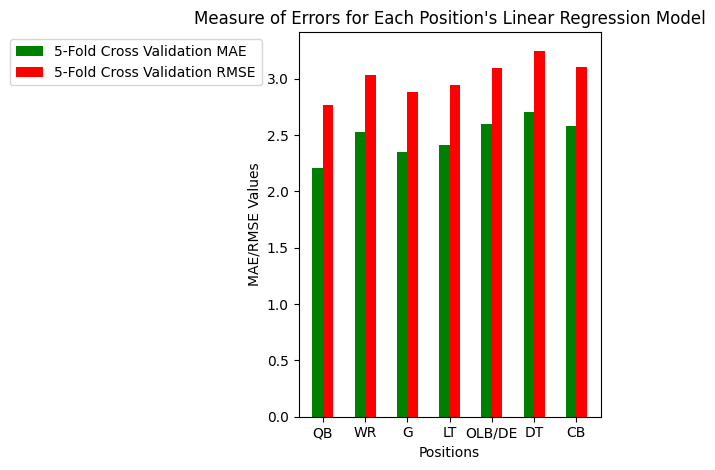

In [243]:
labels = ['QB', 'WR', 'G', 'LT', 'OLB/DE', "DT", "CB"]
validation_MAEs = [QB_vMAE, WR_vMAE, G_vMAE, LT_vMAE, OLB_DE_vMAE, DT_vMAE, CB_vMAE]
validation_RMSEs = [QB_vRMSE, WR_vRMSE, G_vRMSE, LT_vRMSE, OLB_DE_vRMSE, DT_vRMSE, CB_vRMSE]

x = np.arange(len(labels))  # the label locations
width = 0.25  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, validation_MAEs, width, label='5-Fold Cross Validation MAE', color="green")
rects2 = ax.bar(x + width/2, validation_RMSEs, width, label='5-Fold Cross Validation RMSE', color='red')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('MAE/RMSE Values')
ax.set_title("Measure of Errors for Each Position's Linear Regression Model")
ax.set_xlabel('Positions')
ax.set_xticks(x, labels)
ax.legend()


plt.legend( loc='upper right', bbox_to_anchor=(-0.1, 1.), fontsize=10)
fig.tight_layout()

plt.show()

The visualization above depicts the 5-fold cross validation errors from every linear regression model we ran on each position. The measurements of error we are using are Mean Absolute Error (MAE), and Root Mean Squared Error (RMSE). Every position's prediction is right around 2-3 games. We are pleased with this outcome because the linear regression model has limitations. 

The site https://iq.opengenus.org/advantages-and-disadvantages-of-linear-regression/ has a good explanation of advantages and disadvantages of linear regressions. For example, the site states: "Since linear regression assumes a linear relationship between the input and output variables, it fails to fit complex datasets properly. In most real life scenarios the relationship between the variables of the dataset isn't linear and hence a straight line doesn't fit the data properly." 

# Model 2

Model 2, Version 1:

This is where we take the predicted wins value for each highest paid position of each team, from seasons 2014-2020. We plug these values into a DataFrame, this one being called 'm1_v1'. Due to inconsistencies while merging the datasets, there were lots of NaN values. So, we dropped any teams from this DataFrame that had as small as only 1 NaN player. We chose to do this because we wanted the data for m1_v1 to be strictly derived from our datasets. The independent values were the individual players' win predictions, and the dependent/predicted value was the team's win value for the season.

Model 2, Version 2:

While version 1 worked out to be somewhat accurate, since we dropped so many observations due to the NaN values, we decided that we'd run a similar model, imputing values for the missing data. This turned out to be Model 2, Version 2, in DataFrame 'm2_v2'. We imputed the data based on two conditions: If there were other instances of a player, where we could obtain other predicted win values they have for other seasons, we took the mean of those values. Otherwise, we'd set their predicted win value as the average of all predicted win values for that given position. Once we did this and updated the DataFrame, m2_v2 was ready to run.

In [244]:
#Making index labels for model 2. Each observation/row will be a team for each season

season_years = [2014, 2015, 2016, 2017, 2018, 2019, 2020]
season_yrs = [14, 15, 16, 17, 18, 19, 20]
m2_teams = []


for year in range(len(season_years)):
    
    lst = "team_list" + str(season_yrs[year])
    
    for team in globals()[lst]:
        
        string = str(season_years[year]) + " " + str(team)
        m2_teams.append(string)

In [245]:
m2Wins = []

season_years = [2014, 2015, 2016, 2017, 2018, 2019, 2020]
for year in range(len(season_years)):
    df = cap_wins[cap_wins["season"]==season_years[year]]
    df = df.drop_duplicates(subset=["team"])
    win_series = df["Season Wins"]
    win_list = win_series.tolist()
    for i in range(len(win_list)):
        m2Wins.append(win_list[i])

In [246]:
m2 = pd.DataFrame(index=m2_teams, columns=([important_pos]))
m2["Season Wins"] = m2Wins
for i in range(len(important_pos)):
    m2[important_pos[i]] = 0

In [247]:
preds_list = [predictedQBs_top7, predictedWRs_top7, predictedOLBDEs_top7, predictedGs_top7, predictedLTs_top7, predictedCBs_top7,predictedDTs_top7]
preds_posName = ["QB", "WR", "OLB/DE", "G", "LT","CB","DT"]

for pred in range(len(preds_list)):
    predictedXs_top7 = preds_list[pred]
    pos = preds_posName[pred]
    
    for i in range(len(m2)):
        year = m2.index[i][0:4]
        year = int(year)
        team = m2.index[i][5:]
        obs = m2.index[i]
        
        for XB in range(len(predictedXs_top7)):
            
            if (predictedXs_top7.loc[XB]["season"]==year):
                if (predictedXs_top7.loc[XB]["team"]==team):
                    
                    m2.at[obs, pos] = predictedXs_top7.iloc[XB]["Predicted Wins"]

In [248]:
m2.head()

,QB,WR,G,LT,CB,OLB/DE,DT,Season Wins
2014 Arizona Cardinals,8.441939,7.149763,8.057731,NaN,7.490565,8.091527,NaN,11.0
2014 Atlanta Falcons,8.970833,8.863835,7.026033,6.010811,8.635652,NaN,6.397270,6.0
2014 Baltimore Ravens,9.551640,NaN,10.347530,8.740452,7.316481,7.472618,NaN,10.0
2014 Buffalo Bills,6.540034,6.384086,7.537907,7.255350,7.281883,8.069840,7.559048,9.0
2014 Carolina Panthers,6.563993,7.840383,6.209177,7.888935,8.369538,8.307562,6.550562,7.0


In [249]:
predictedXs_top7_list = [predictedQBs_top7, predictedWRs_top7, predictedGs_top7, predictedLTs_top7, predictedCBs_top7, predictedOLBDEs_top7, predictedDTs_top7]
top7_posList = ["QB", "WR", "G", "LT", "CB", "OLB/DE", "DT"]
for i in range(len(predictedXs_top7_list)):
    num = predictedXs_top7_list[i].isna().sum()["Predicted Wins"]
    print("For "+ top7_posList[i] +" there are "+str(num)+" NaN players.")

For QB there are 4 NaN players.
For WR there are 10 NaN players.
For G there are 21 NaN players.
For LT there are 18 NaN players.
For CB there are 51 NaN players.
For OLB/DE there are 68 NaN players.
For DT there are 87 NaN players.


Because of these unfortunate numbers, we will run two versions of Model 2:
    
1. A version where we drop any team with a NaN player. This will cause the amount of observations we have to be extremely low, however we will be confident that it is all real data, and none of it will be imputed.
        
        
2. The next version will contain all teams, but with imputed data for the missing players. For our plan to impute the data, first we will check if there are any other instances of a missing player. If there are, we will average their win predictions from other seasons. In the case that there are no other instances of that player, we will take the average of all of that position's "Predicted Wins".

# Model 2 - Version 1 (Dropping NaN Values)

In [250]:
m2_v1 = m2.dropna()
m2_v1

,QB,WR,G,LT,CB,OLB/DE,DT,Season Wins
2014 Buffalo Bills,6.540034,6.384086,7.537907,7.255350,7.281883,8.069840,7.559048,9.0
2014 Carolina Panthers,6.563993,7.840383,6.209177,7.888935,8.369538,8.307562,6.550562,7.0
2014 Denver Broncos,10.247928,9.124914,9.843797,9.354185,9.091350,7.661908,7.610400,12.0
2014 Detroit Lions,8.672272,7.830796,7.361104,8.146990,8.371017,7.421695,4.722927,11.0
2014 Jacksonville Jaguars,5.718484,4.590797,7.479794,6.233458,6.842397,8.016994,6.447660,3.0
...,...,...,...,...,...,...,...,...
2020 Kansas City Chiefs,12.691117,10.940334,6.950050,6.966988,8.352352,8.479186,10.953045,14.0
2020 New Orleans Saints,10.972926,7.929272,8.683009,9.712931,7.281969,7.840333,8.548717,12.0
2020 Philadelphia Eagles,3.495005,7.424271,6.114311,6.949321,6.821287,8.459693,7.819872,4.0
2020 Pittsburgh Steelers,11.635026,9.579045,6.537612,7.305872,8.017665,8.345497,9.205251,12.0


In [251]:
#Choosing test features
m2feats = ['QB', 'WR', 'G', 'LT', 'CB', 'OLB/DE', 'DT']
#Assigning X (features/attributes)
x = m2_v1[m2feats]
#Assigning Y (label/predicted val)
y = m2_v1['Season Wins']


#Split the data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.5, random_state=28)

#Standardizing the data
scaler = StandardScaler()
scaler.fit(x_train)
x_train_sc = scaler.transform(x_train)
x_test_sc = scaler.transform(x_test)


#Setting up Linear Regression Model
linReg = LinearRegression()
linReg.fit(x_train_sc, y_train)

#Letting model make prediction
y_test_pred = linReg.predict(x_test_sc)
y_train_pred = linReg.predict(x_train_sc)


#Checking MAE, MSE, and RMSE
vMAE = (metrics.mean_absolute_error(y_test, y_test_pred))
tMAE = (metrics.mean_absolute_error(y_train, y_train_pred))
cMAE = np.mean(-cross_val_score(linReg, x, y, cv=5, scoring="neg_mean_absolute_error"))


vMSE = (metrics.mean_squared_error(y_test, y_test_pred))
tMSE = (metrics.mean_squared_error(y_train, y_train_pred))
cross_val_mse = np.mean(-cross_val_score(linReg, x, y, cv=5, scoring="neg_mean_squared_error"))

vRMSE = math.sqrt(vMSE)
tRMSE = math.sqrt(tMSE)
cRMSE = math.sqrt(cross_val_mse)

print("Testing MAE:")
print(tMAE)
print("\n")

print("5-Fold Cross Validation MAE:")
print(cMAE)
print("\n")

print("Testing RMSE:")
print(tRMSE)
print("\n")

print("5-Fold Cross Validation RMSE:")
print(cRMSE)

Testing MAE:
1.3496552022248398


5-Fold Cross Validation MAE:
1.654996130155411


Testing RMSE:
1.7097748348507535


5-Fold Cross Validation RMSE:
1.9430020268049606


In [252]:
m2_v1_Train = m2_v1.loc[y_train.index]
m2_v1_Train["Predicted Wins"] = y_train_pred
#____________________________________________________________________________________________________________________________
m2_v1_Test = m2_v1.loc[y_test.index]
m2_v1_Test["Predicted Wins"] = y_test_pred


m2_v1_outcome = pd.concat([m2_v1_Test, m2_v1_Train])
m2_v1_outcome

,QB,WR,G,LT,CB,OLB/DE,DT,Season Wins,Predicted Wins
2016 Detroit Lions,12.769274,7.554102,6.560364,6.187133,8.627071,8.293635,8.534591,9.0,11.390046
2017 New Orleans Saints,10.751810,10.084856,9.398547,8.654398,9.170796,8.405706,9.389894,11.0,11.665590
2015 Atlanta Falcons,8.779783,7.891623,6.787145,8.703320,9.708162,7.753801,8.390909,8.0,10.011090
2019 Minnesota Vikings,9.696234,9.503118,10.291423,10.023391,7.197801,8.044361,7.999770,10.0,10.843352
2014 Seattle Seahawks,9.852861,8.388273,10.149975,10.708031,7.631377,9.019768,7.563699,12.0,10.888395
...,...,...,...,...,...,...,...,...,...
2014 Detroit Lions,8.672272,7.830796,7.361104,8.146990,8.371017,7.421695,4.722927,11.0,9.314987
2017 Los Angeles Chargers,10.402913,7.816466,8.706757,8.710792,11.260816,7.937051,7.998503,9.0,11.424056
2016 Oakland Raiders,9.229244,8.044700,9.168310,9.541868,8.266557,9.556881,7.629519,12.0,9.696218
2014 Miami Dolphins,9.822299,9.374847,8.151273,7.999163,8.201165,8.682039,6.763200,8.0,10.184038


# Model 2 - Version 2 (Imputing Data)

In [253]:
predictedXs_top7_list = [predictedQBs_top7, predictedWRs_top7, predictedGs_top7, predictedLTs_top7, predictedCBs_top7, predictedOLBDEs_top7, predictedDTs_top7]
missingX = []
top7_posList = ["QB", "WR", "G", "LT", "CB", "OLB_DE", "DT"]

for i in range(len(top7_posList)):
    
    df = predictedXs_top7_list[i]
    
    missingStr = "missing" + top7_posList[i]
    globals()[missingStr] = df[df['Predicted Wins'].isna()]
    missingX.append(globals()[missingStr])   

In [254]:
predictedXs_top7_list = [predictedQBs_top7, predictedWRs_top7, predictedGs_top7, predictedLTs_top7, predictedCBs_top7, predictedOLBDEs_top7, predictedDTs_top7]

for x in range(len(missingX)):
    missingXB = missingX[x]
    predictedXs_top7 = predictedXs_top7_list[x]


    for i in range(len(missingXB)):
        player = missingXB.iloc[i]["Player"]
        team = missingXB.iloc[i]["team"]
        season = missingXB.iloc[i]["season"]
        mean_pred = predictedXs_top7.dropna()["Predicted Wins"].mean()
    
    
        df = predictedXs_top7[predictedXs_top7['Player']==player]
        df = df.dropna()
        dfLen = len(df)

        idx = missingXB.index[i]
    
    #If there are other instances of a player, average their predicted wins
        if dfLen > 1:
            season_wins_list = []
            predicted_wins_list = []
            for x in range(dfLen):
                pred_win = df.iloc[x]["Predicted Wins"]
                seas_win = df.iloc[x]["Season Wins"]
                if pred_win > 0:
                    predicted_wins_list.append(pred_win)
                if seas_win > 0:
                    season_wins_list.append(seas_win)
            
            new_seas = sum(season_wins_list)/len(season_wins_list)
#             if len(predicted_wins_list) >= 1:
            new_pred = sum(predicted_wins_list)/len(predicted_wins_list)
            
            missingXB.at[missingXB.index[i], "Predicted Wins"] = new_pred
            missingXB.at[missingXB.index[i], "Season Wins"] = new_seas
                
        
        else:
    #Assign the average of all predicted values for the position to their predicted value
            missingXB.at[missingXB.index[i], "Predicted Wins"] = mean_pred

    #Updating row in predictedQBs_top7
        (predictedXs_top7.iloc[idx]) = (missingXB.loc[idx])

In [255]:
preds_list = [predictedQBs_top7, predictedWRs_top7, predictedOLBDEs_top7, predictedGs_top7, predictedLTs_top7, predictedCBs_top7,predictedDTs_top7]
preds_posName = ["QB", "WR", "OLB/DE", "G", "LT","CB","DT"]

for pred in range(len(preds_list)):
    predictedXs_top7 = preds_list[pred]
    pos = preds_posName[pred]
    
    for i in range(len(m2)):
        year = m2.index[i][0:4]
        year = int(year)
        team = m2.index[i][5:]
        obs = m2.index[i]
        
        for XB in range(len(predictedXs_top7)):
            
            if (predictedXs_top7.loc[XB]["season"]==year):
                if (predictedXs_top7.loc[XB]["team"]==team):
                    
                    m2.at[obs, pos] = predictedXs_top7.iloc[XB]["Predicted Wins"]

In [256]:
m2_v2 = m2
m2_v2 = m2_v2.dropna()

In [257]:
#Choosing test features
m2feats = ['QB', 'WR', 'G', 'LT', 'CB', 'OLB/DE', 'DT']
#Assigning X (features/attributes)
x = m2_v2[m2feats]
#Assigning Y (label/predicted val)
y = m2_v2['Season Wins']


#Split the data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.5, random_state=28)

#Standardizing the data
scaler = StandardScaler()
scaler.fit(x_train)
x_train_sc = scaler.transform(x_train)
x_test_sc = scaler.transform(x_test)


#Setting up Linear Regression Model
linReg = LinearRegression()
linReg.fit(x_train_sc, y_train)

#Letting model make prediction
y_test_pred = linReg.predict(x_test_sc)
y_train_pred = linReg.predict(x_train_sc)


#Checking MAE, MSE, and RMSE
vMAE = (metrics.mean_absolute_error(y_test, y_test_pred))
tMAE = (metrics.mean_absolute_error(y_train, y_train_pred))
cMAE = np.mean(-cross_val_score(linReg, x, y, cv=5, scoring="neg_mean_absolute_error"))


vMSE = (metrics.mean_squared_error(y_test, y_test_pred))
tMSE = (metrics.mean_squared_error(y_train, y_train_pred))
cross_val_mse = np.mean(-cross_val_score(linReg, x, y, cv=5, scoring="neg_mean_squared_error"))

vRMSE = math.sqrt(vMSE)
tRMSE = math.sqrt(tMSE)
cRMSE = math.sqrt(cross_val_mse)

print("Testing MAE:")
print(tMAE)
print("\n")

print("5-Fold Cross Validation MAE:")
print(cMAE)
print("\n")

print("Testing RMSE:")
print(tRMSE)
print("\n")

print("5-Fold Cross Validation RMSE:")
print(cRMSE)

Testing MAE:
1.6284721272686582


5-Fold Cross Validation MAE:
1.7086694243127478


Testing RMSE:
2.0856872305751484


5-Fold Cross Validation RMSE:
2.1264474900767656


In [258]:
m2_v2_Train = m2_v2.loc[y_train.index]
m2_v2_Train["Predicted Wins"] = y_train_pred
#____________________________________________________________________________________________________________________________
m2_v2_Test = m2_v2.loc[y_test.index]
m2_v2_Test["Predicted Wins"] = y_test_pred


m2_v2_outcome = pd.concat([m2_v2_Test, m2_v2_Train])
m2_v2_outcome

,QB,WR,G,LT,CB,OLB/DE,DT,Season Wins,Predicted Wins
2014 Kansas City Chiefs,8.684621,7.305796,7.190304,8.098351,8.542868,7.664493,8.044294,9.0,8.340331
2020 Atlanta Falcons,6.239494,8.631058,7.745213,7.637525,8.242688,8.228499,8.154317,4.0,6.487964
2016 Atlanta Falcons,10.989724,8.415735,8.331819,8.369500,8.938461,7.970660,8.069387,11.0,10.634275
2018 Detroit Lions,6.094865,8.214099,8.282068,8.464551,8.947810,8.228499,7.261145,6.0,6.724750
2018 Buffalo Bills,6.200679,7.709498,8.223057,8.169550,7.131391,8.518735,7.440733,6.0,6.035423
...,...,...,...,...,...,...,...,...,...
2014 Buffalo Bills,6.540034,6.384086,7.537907,7.255350,7.281883,8.069840,7.559048,9.0,5.421770
2015 Arizona Cardinals,11.604640,10.534195,8.854790,7.378645,7.963048,8.044556,8.057019,13.0,10.447188
2014 Oakland Raiders,8.979809,8.260965,7.521185,6.772366,7.013113,8.920772,7.072226,3.0,7.294637
2014 Chicago Bears,5.404231,8.559694,8.223161,8.103879,8.315712,8.284674,8.045333,5.0,6.121256


# Model 2 Results and Findings

<AxesSubplot: title={'center': 'NFL 2014 Predicted vs. Actual Wins'}, ylabel='Win Value'>

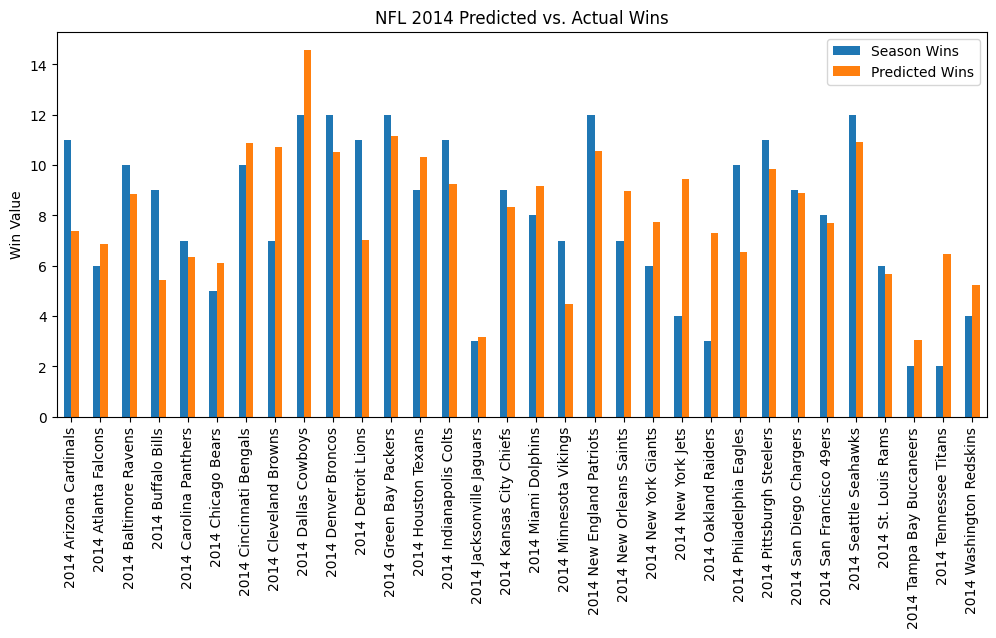

In [259]:
act_vs_pred = pd.DataFrame()
p = m2_v2_outcome["Predicted Wins"].sort_index().squeeze()
a = m2_v2_outcome["Season Wins"].sort_index().squeeze()
act_vs_pred["Season Wins"] = a
act_vs_pred["Predicted Wins"] = p
act_vs_pred.iloc[0:32].plot.bar(width=.5, figsize=(12,5), ylabel="Win Value", title="NFL 2014 Predicted vs. Actual Wins")

The above model is a grouped bar chart showing predicted versus actual wins for the 32 teams in the 2014 NFL season. As the legend in the top right corner specifies, the blue bars are a team's actual wins, and the orange bars are a team's predicted wins from Model 2, Version 2. As one could see, some values were closely predicted, and others not so much. With a 5-Fold CV MAE of 1.7 and a 5-Fold CV RMSE of 2.1, the error visualized in this chart makes more sense. We are pleased with these results because we are using a linear regression model which has limitations (like we previously mentioned).

<AxesSubplot: title={'center': "Each Position's Beta Coefficient Value"}, xlabel='Position', ylabel='Coefficient Value'>

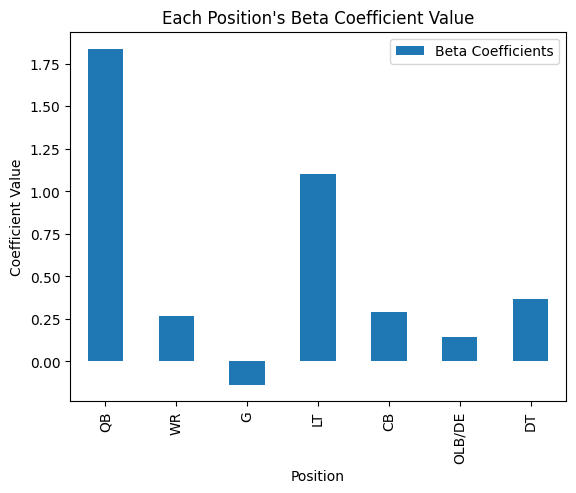

In [260]:
coefficients = pd.concat([pd.DataFrame(m2feats),pd.DataFrame(np.transpose(linReg.coef_))], axis = 1)
coefficients = coefficients.set_index([m2feats])
coefficients = np.transpose(coefficients)
coefficients.iloc[0] = coefficients.iloc[1]
coefficients = coefficients.drop_duplicates()
coefficients = np.transpose(coefficients)
coefficients = coefficients.rename(columns={0: "Beta Coefficients"})
coefficients.plot.bar(title="Each Position's Beta Coefficient Value", xlabel="Position", ylabel="Coefficient Value")

The graph above shows us the beta coefficients for each position in Model 2, Version 2. The higher the beta coefficient, the more "importance" the model places on that specific position. We see that the model placed high importance on QB and LT. 

<h1><center>5. Conclusion<h1><center>

We were relatively successful in predicting NFL teams’ success with a limited number of positions. The linear regression model was able to predict, on average, within 2-3 wins for any given NFL franchise. Our findings suggest that the importance of each position in the NFL is weighted quite differently when predicting team wins. For instance, when looking at the graph displaying the positions' beta coefficients, you see that the top 2 positions are offensive positions. Many people reference the importance of scoring points in "modern football", and our findings support this claim. As Dan Marino once said, "There is no defense against a perfect pass. I can throw a perfect pass.” 

However, a large portion of one player's success comes from those around him. For instance, a QB needs a WR to get open and the WR needs the QB to throw a good pass. Our goal was not to evaluate "team" stats, but to try to separate positions and use only those deemed significant. We believe we accomplished this and have more ideas for improvement. For example, since our data is limited and contains NaN values, an XGBoost model would most likely have predicted with higher success, compared to our linear regression approach. 

Nevertheless, while this project is far from perfect, we are satisfied with what we've created, and can proudly display a working analysis with many interesting aspects. 

This is our final product for our NFL Analysis, and thank you for reading.

<h1><center>6. Lessons Learned<h1><center>

### If only we could go back in time

1) Using data from two different sources can create nightmare scenarios. 

- We spent too much of our time trying to figure out ways to link data properly so that most of the data would stay. This was incredibly painful and time consuming. However, we found this time was beneficial and applicable to real world scenarios.

2) Save and rerun your notebook multiple times.

- Funky things can happen. When you are working, the order in which variables and functions are instantiated can change after you have been working for a while. This can cause issues later when you open your notebook the next day, and it says "XYZ function or variable is not defined."

3) Planning is essential.

- The hardest part was choosing what we wanted to examine. We had endless options of choices: which data sources to use? Which stats to look at? What time period? etc. We had to make endless judgment calls and constantly narrow down our focus to accomplish our goal of predicting an NFL team's win count. When we first started our project was called "Factors influencing NFL Games" - Looking back now, this sounds like a train wreck because the word "factors" is so vague. Narrow your focus, choose well, clean your data, and your life will be much better.

4) Always focus on the question at hand.

- You can get lost in the sauce. When you are performing an action, function, merge, model, etc, ask yourself why you are doing it. We learned this the hard way and spent a good chunk of our time creating useless functions or graphs. 